<a href="https://colab.research.google.com/github/HarikrishnanK9/Health-Profile-Analysis-Revealing-Disorder-Patterns-MedicationGuidance-and-Risk-Classification/blob/main/Health_Profile_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEALTH PROFILE ANALYSIS: REVEALING DISORDER PATTERNS, MEDICATION GUIDANCE, AND RISK CLASSIFICATION**

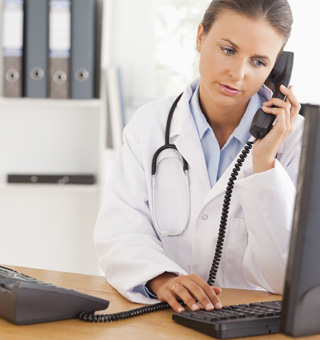

Diseases Risk Prediction Dataset, obtained from kaggle.Its source is the Behavioral Risk Factor Surveillance System (BRFSS). BRFSS conducts health-related phone surveys in the United States, gathering information on residents' health behaviors, chronic conditions, and use of preventive services.The Dataset contains 3,08,854 instances under 19 variables. 12 are numerical and 7 are categorical variables.

# **OBJECTIVES**
* Analyze the data
* Extract the hidden trends and patterns
* Group the reviewers based upon health conditions and risk
* Analyze Each clusters and find out the nature for better medical recommendations
* Examine which Machine Learning Algorithm is most suitable for this dataset


# **IMPORTING NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **LOADING THE DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/My Drive/Data/CVD_cleaned.csv')
df


General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   
1               No           No         No   
2               No           No         No   
3               No           No         No   
4               No           No         No   
...            ...          ...        ...   
308849          No           No         No   
308850          No           No         No   
308851          No           No        Yes   
308852          No           No         No   
308853          No           No         No   

                                          Diabetes Arthritis     Sex  \
0                                               No       Yes  Female   
1                                              Yes        No  Female   
2                                              Yes        No  Female   
3                                              Yes        No    Male   
4                                               No        No    Male   
...                                            ...       ...     ...   
308849                                          No        No    Male   
308850                                         Yes        No    Male   
308851  Yes, but female told only during pregnancy        No  Female   
308852                                          No        No    Male   
308853                                          No        No  Female   

       Age_Category  Height_(cm)  Weight_(kg)    BMI Smoking_History  \
0             70-74        150.0        32.66  14.54             Yes   
1             70-74        165.0        77.11  28.29              No   
2             60-64        163.0        88.45  33.47              No   
3             75-79        180.0        93.44  28.73              No   
4               80+        191.0        88.45  24.37             Yes   
...             ...          ...          ...    ...             ...   
308849        25-29        168.0        81.65  29.05              No   
308850        65-69        180.0        69.85  21.48              No   
308851        30-34        157.0        61.23  24.69             Yes   
308852        65-69        183.0        79.38  23.73              No   
308853        45-49        160.0        81.19  31.71              No   

        Alcohol_Consumption  Fruit_Consumption  Green_Vegetables_Consumption  \
0                       0.0               30.0                          16.0   
1                       0.0               30.0                           0.0   
2                       4.0               12.0                           3.0   
3                       0.0               30.0                          30.0   
4                       0.0                8.0                           4.0   
...                     ...                ...                           ...   
308849                  4.0               30.0                           8.0   
308850                  8.0               15.0                          60.0   
308851                  4.0               40.0                           8.0   
308852                  3.0               30.0 

# **UNDERSTANDING THE DATASET**

In [ ]:
df.head()

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  14.54             Yes                  0.0   
1        165.0        77.11  28.29              No                  0.0   
2        163.0        88.45  33.47              No                  4.0   
3        180.0        93.44  28.73              No                  0.0   
4        191.0        88.45  24.37             Yes                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0               30.0                          16.0                     12.0  
1               30.0                           0.0                      4.0  
2               12.0                           3.0                     16.0  
3               30.0                          30.0                      8.0  
4                8.0                           4.0                      0.0

In [ ]:
df.tail()

General_Health                  Checkup Exercise Heart_Disease  \
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
308849          No           No         No   
308850          No           No         No   
308851          No           No        Yes   
308852          No           No         No   
308853          No           No         No   

                                          Diabetes Arthritis     Sex  \
308849                                          No        No    Male   
308850                                         Yes        No    Male   
308851  Yes, but female told only during pregnancy        No  Female   
308852                                          No        No    Male   
308853                                          No        No  Female   

       Age_Category  Height_(cm)  Weight_(kg)    BMI Smoking_History  \
308849        25-29        168.0        81.65  29.05              No   
308850        65-69        180.0        69.85  21.48              No   
308851        30-34        157.0        61.23  24.69             Yes   
308852        65-69        183.0        79.38  23.73              No   
308853        45-49        160.0        81.19  31.71              No   

        Alcohol_Consumption  Fruit_Consumption  Green_Vegetables_Consumption  \
308849                  4.0               30.0                           8.0   
308850                  8.0               15.0                          60.0   
308851                  4.0               40.0                           8.0   
308852                  3.0               30.0                          12.0   
308853                  1.0                5.0                          12.0   

        FriedPotato_Consumption  
308849                      0.0  
308850                      4.0  
308851                      4.0  
308852                      0.0  
308853                      1.0

In [ ]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [ ]:
df.describe().T

count        mean        std    min     25%  \
Height_(cm)                   308854.0  170.615249  10.658026  91.00  163.00   
Weight_(kg)                   308854.0   83.588655  21.343210  24.95   68.04   
BMI                           308854.0   28.626211   6.522323  12.02   24.21   
Alcohol_Consumption           308854.0    5.096366   8.199763   0.00    0.00   
Fruit_Consumption             308854.0   29.835200  24.875735   0.00   12.00   
Green_Vegetables_Consumption  308854.0   15.110441  14.926238   0.00    4.00   
FriedPotato_Consumption       308854.0    6.296616   8.582954   0.00    2.00   

                                 50%     75%     max  
Height_(cm)                   170.00  178.00  241.00  
Weight_(kg)                    81.65   95.25  293.02  
BMI                            27.44   31.85   99.33  
Alcohol_Consumption             1.00    6.00   30.00  
Fruit_Consumption              30.00   30.00  120.00  
Green_Vegetables_Consumption   12.00   20.00  128.00  
FriedPotato_Consumption         4.00    8.00  128.00

**Observation:**

* The 50th quartiles of fried potato consumption, green vegetable consumption, alcohol consumption, and weight are less than their respective mean values, indicating right skewness and possible outliers or extreme values in these variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [ ]:
df.shape

(308854, 19)

# **DATA CLEANING**

(General_Health                  0
 Checkup                         0
 Exercise                        0
 Heart_Disease                   0
 Skin_Cancer                     0
 Other_Cancer                    0
 Depression                      0
 Diabetes                        0
 Arthritis                       0
 Sex                             0
 Age_Category                    0
 Height_(cm)                     0
 Weight_(kg)                     0
 BMI                             0
 Smoking_History                 0
 Alcohol_Consumption             0
 Fruit_Consumption               0
 Green_Vegetables_Consumption    0
 FriedPotato_Consumption         0
 dtype: int64,
 <Axes: >)

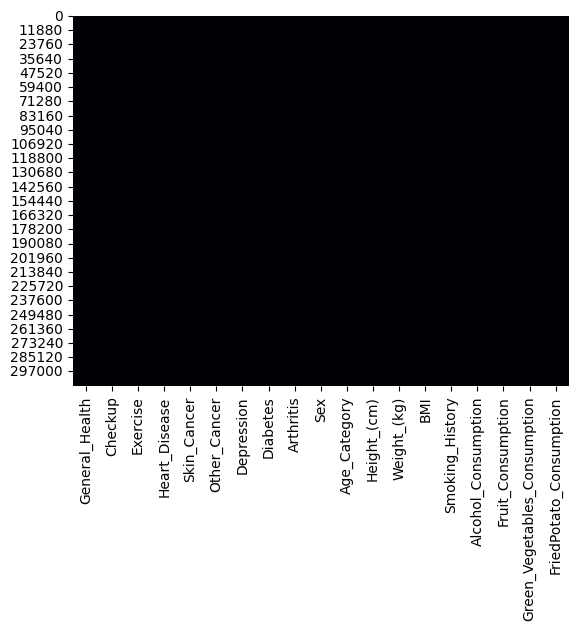

In [ ]:
df.isna().sum(),sns.heatmap(df.isna(),cmap='magma', cbar=False)

In [ ]:
df.duplicated().sum()

80

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:

df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
df["Diabetes"].unique()

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

In [ ]:
df["Diabetes"].replace(["No, pre-diabetes or borderline diabetes", "Yes, but female told only during pregnancy"], ["No", "Yes"],inplace=True)


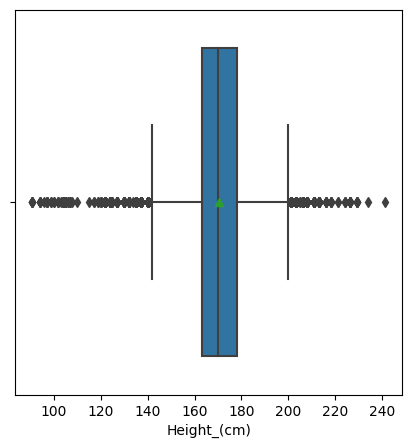

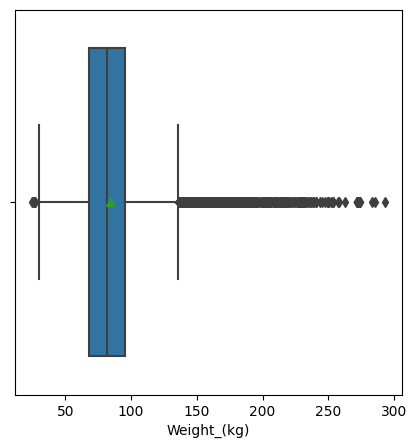

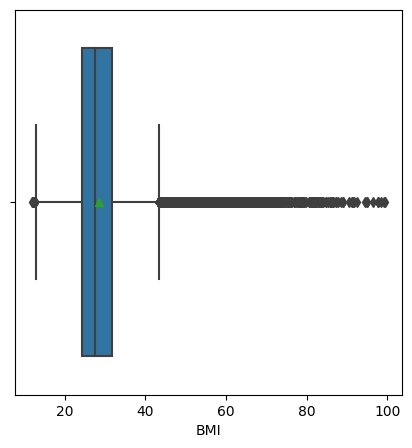

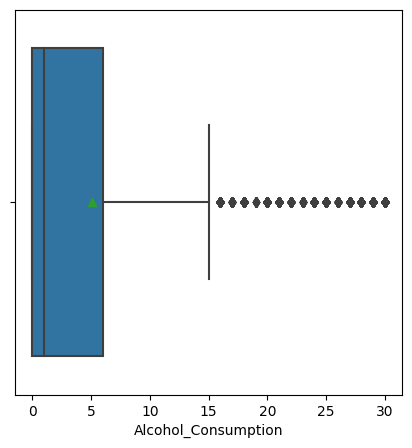

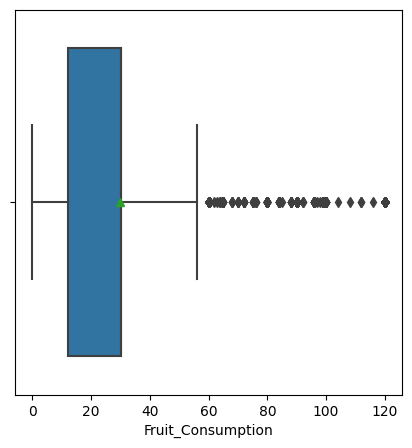

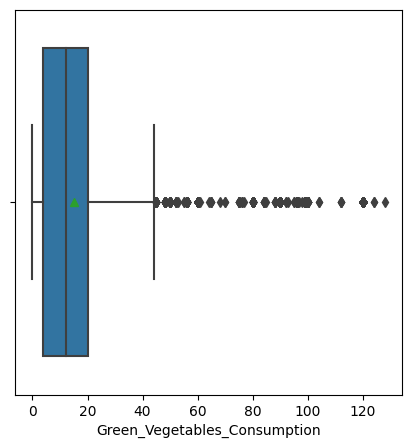

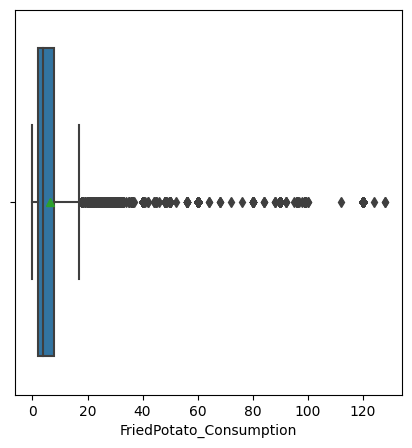

In [ ]:
lst = [ 'Height_(cm)', 'Weight_(kg)', 'BMI','Alcohol_Consumption', 'Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption']
for i in lst:
  plt.figure(figsize=(5,5))
  sns.boxplot(x=i,data=df,showmeans=True)
  plt.show()

**Observations:**
* As expected there are extreme values/ outliers are present in the dataset,especially on the right side of the attributes.

Once again checking the mean and maximum values,because here handling a medical related dataset there is a possibility of extreme medical conditions

In [ ]:
lst = [ 'Height_(cm)', 'Weight_(kg)', 'BMI','Alcohol_Consumption', 'Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption']
for i in lst:
  print("Minimium value of ",i,"is",df[i].min())
  print("Mean value of ",i,"is",df[i].mean())
  print("Maximum value of ",i,"is",df[i].max())
  print("-"*75)

Minimium value of  Height_(cm) is 91.0
Mean value of  Height_(cm) is 170.61522019341007
Maximum value of  Height_(cm) is 241.0
---------------------------------------------------------------------------
Minimium value of  Weight_(kg) is 24.95
Mean value of  Weight_(kg) is 83.59039922402795
Maximum value of  Weight_(kg) is 293.02
---------------------------------------------------------------------------
Minimium value of  BMI is 12.02
Mean value of  BMI is 28.626813235570356
Maximum value of  BMI is 99.33
---------------------------------------------------------------------------
Minimium value of  Alcohol_Consumption is 0.0
Mean value of  Alcohol_Consumption is 5.097556789107891
Maximum value of  Alcohol_Consumption is 30.0
---------------------------------------------------------------------------
Minimium value of  Fruit_Consumption is 0.0
Mean value of  Fruit_Consumption is 29.834289804193357
Maximum value of  Fruit_Consumption is 120.0
---------------------------------------------

Observations:
* There is a significant difference between the mean value and the maximum value of some attributes. This may be due to reviewers providing false information or making assumptions while responding to the phone call-based review system.

In [ ]:
 # Counting the ouliers in each feature
lst = [ 'Height_(cm)', 'Weight_(kg)', 'BMI','Alcohol_Consumption', 'Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption']
for i in lst:
  Q1 = df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR = Q3-Q1
  lower = Q1-3*IQR
  upper = Q3+3*IQR
  ot_cnt = ((df[i]<lower) | (df[i]>upper)).sum()
  ot_percentage = np.divide(np.multiply(ot_cnt,100),308854)
  ot_round = np.round(ot_percentage,decimals=0)
  print(i," : ",ot_cnt," : ",ot_round,"%")

Height_(cm)  :  82  :  0.0 %
Weight_(kg)  :  684  :  0.0 %
BMI  :  1279  :  0.0 %
Alcohol_Consumption  :  21221  :  7.0 %
Fruit_Consumption  :  19939  :  6.0 %
Green_Vegetables_Consumption  :  2889  :  1.0 %
FriedPotato_Consumption  :  11254  :  4.0 %


In [ ]:
lst = [ 'Height_(cm)', 'Weight_(kg)', 'BMI','Alcohol_Consumption', 'Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption']
for i in lst:
  Q1 = df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR = Q3-Q1
  lower = Q1-3*IQR
  upper = Q3+3*IQR
  df= df[(df[i]>=lower) &(df[i]<=upper)|(df[i].isnull())]
df.reset_index(drop=True, inplace=True)
df

General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
256257      Very Good     Within the past year      Yes            No   
256258           Fair  Within the past 5 years      Yes            No   
256259      Very Good      5 or more years ago      Yes            No   
256260      Very Good     Within the past year      Yes            No   
256261      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression Diabetes Arthritis     Sex  \
0               No           No         No       No       Yes  Female   
1               No           No         No      Yes        No  Female   
2               No           No         No      Yes        No  Female   
3               No           No         No      Yes        No    Male   
4               No           No         No       No        No    Male   
...            ...          ...        ...      ...       ...     ...   
256257          No           No         No       No        No    Male   
256258          No           No         No      Yes        No    Male   
256259          No           No        Yes      Yes        No  Female   
256260          No           No         No       No        No    Male   
256261          No           No         No       No        No  Female   

       Age_Category  Height_(cm)  Weight_(kg)    BMI Smoking_History  \
0             70-74        150.0        32.66  14.54             Yes   
1             70-74        165.0        77.11  28.29              No   
2             60-64        163.0        88.45  33.47              No   
3             75-79        180.0        93.44  28.73              No   
4               80+        191.0        88.45  24.37             Yes   
...             ...          ...          ...    ...             ...   
256257        25-29        168.0        81.65  29.05              No   
256258        65-69        180.0        69.85  21.48              No   
256259        30-34        157.0        61.23  24.69             Yes   
256260        65-69        183.0        79.38  23.73              No   
256261        45-49        160.0        81.19  31.71              No   

        Alcohol_Consumption  Fruit_Consumption  Green_Vegetables_Consumption  \
0                       0.0               30.0                          16.0   
1                       0.0               30.0                           0.0   
2                       4.0               12.0                           3.0   
3                       0.0               30.0                          30.0   
4                       0.0                8.0                           4.0   
...                     ...                ...                           ...   
256257                  4.0               30.0                           8.0   
256258                  8.0               15.0                          60.0   
256259                  4.0               40.0                           8.0   
256260                  3.0               30.0                          12.0   
256261                  1.0                5.0                          12.0   

        FriedPotato_Consumption  
0                          12.0  
1                           4.0  
2                          16.0  
3                           8.0  
4                           0.0  
...                         ...  
256257                      0.0  
256258                      4.0  
256259                      4.0  
256260                      0.0  
256261                      1.0  

[256262 rows x 19 

# **DATA ANALYSIS**

Checking the distribution of Data

array([[<Axes: title={'center': 'Height_(cm)'}>,
        <Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Fruit_Consumption'}>,
        <Axes: title={'center': 'Green_Vegetables_Consumption'}>],
       [<Axes: title={'center': 'FriedPotato_Consumption'}>, <Axes: >,
        <Axes: >]], dtype=object)

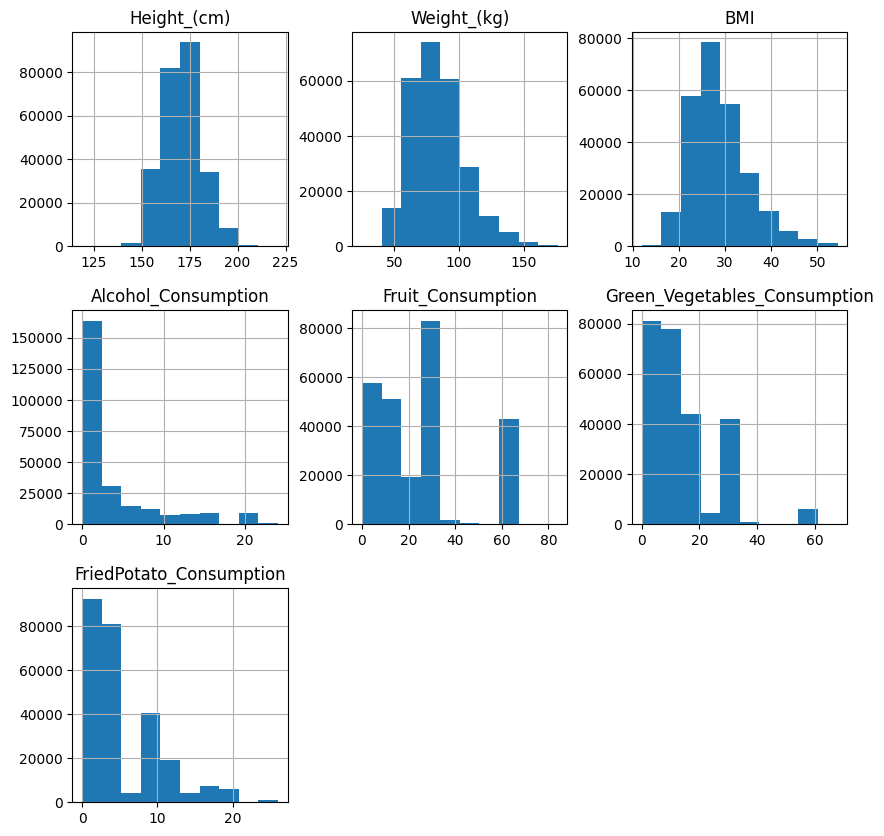

In [ ]:
df.hist(figsize=(10,10))

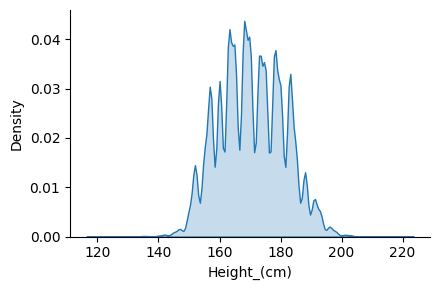

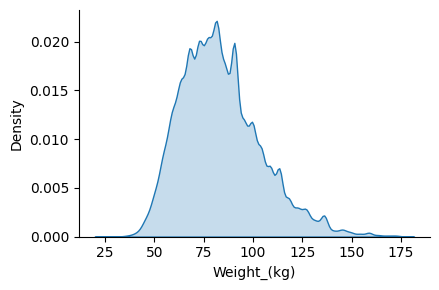

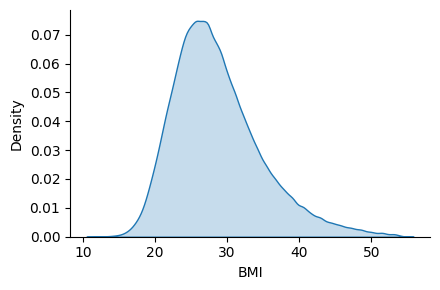

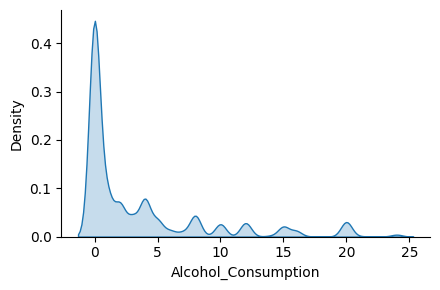

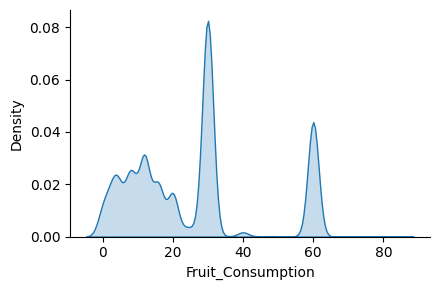

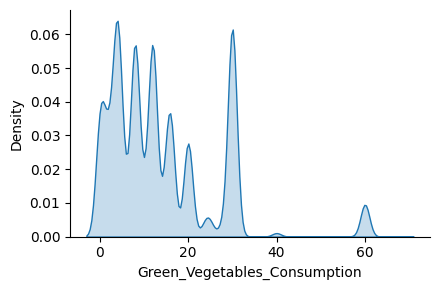

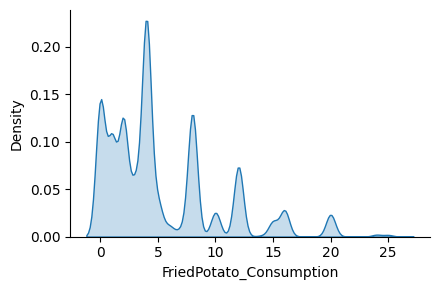

In [ ]:
numerical_attributes = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
for i in numerical_attributes:
    g = sns.FacetGrid(df,height=3,aspect=1.5)
    g = g.map(sns.kdeplot,i,shade=True)

**Observation**

* All are skewed
* Alcohol consumption,green veg consumption,potato consumption,.contains extreme values at the right side.

<Axes: xlabel='General_Health', ylabel='count'>

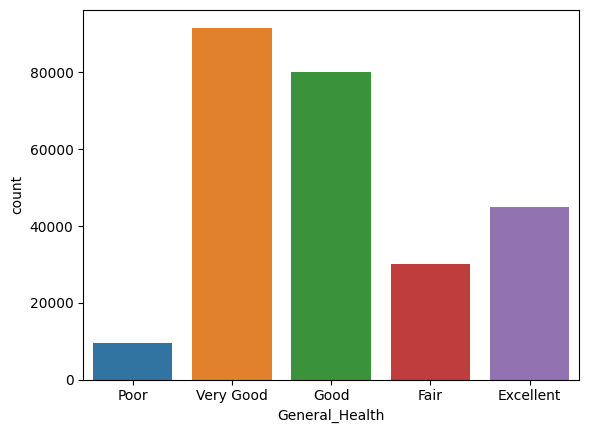

In [ ]:
sns.countplot(data=df,x="General_Health")

In [ ]:
General_Health_sub =["Poor","Very Good","Good","Fair","Excellent"]
for i in General_Health_sub:
  count = df.loc[df["General_Health"]==i] [["General_Health"]].count()
  average=(count*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  Poor General_Health    3
dtype: int64
Percentage of  Very Good General_Health    35
dtype: int64
Percentage of  Good General_Health    31
dtype: int64
Percentage of  Fair General_Health    11
dtype: int64
Percentage of  Excellent General_Health    17
dtype: int64


**Observations**

* **very good>good>excellent>fair>poor**
1. Percentage of "Poor General_Health": 3%
2. Percentage of "Very Good General_Health": 35%
3. Percentage of "Good General_Health": 30%
4. Percentage of "Fair General_Health": 11%
5. Percentage of "Excellent General_Health": 18%

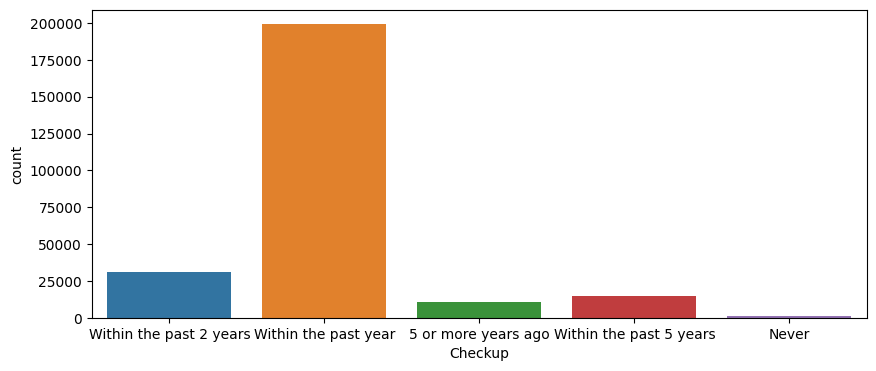

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df,x="Checkup")
plt.show()

In [ ]:
Checkup_sub =["Within the past 2 years","Within the past year","5 or more years ago","Within the past 5 years","Never"]
for i in Checkup_sub:
  countc = df.loc[df["Checkup"]==i] [["Checkup"]].count()
  average=(countc*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  Within the past 2 years Checkup    12
dtype: int64
Percentage of  Within the past year Checkup    77
dtype: int64
Percentage of  5 or more years ago Checkup    4
dtype: int64
Percentage of  Within the past 5 years Checkup    5
dtype: int64
Percentage of  Never Checkup    0
dtype: int64


**Observations:**

* **Within the past year > Within the past 2 years > 5 or more years ago**
1. Percentage of "Within the past 2 years Checkup" is 12%.
2. Percentage of "Within the past year Checkup" is 77%.
3. Percentage of "5 or more years ago Checkup" is 4%.
4. Percentage of "Within the past 5 years Checkup" is 5%.
5. Percentage of "Never Checkup" is 0%.

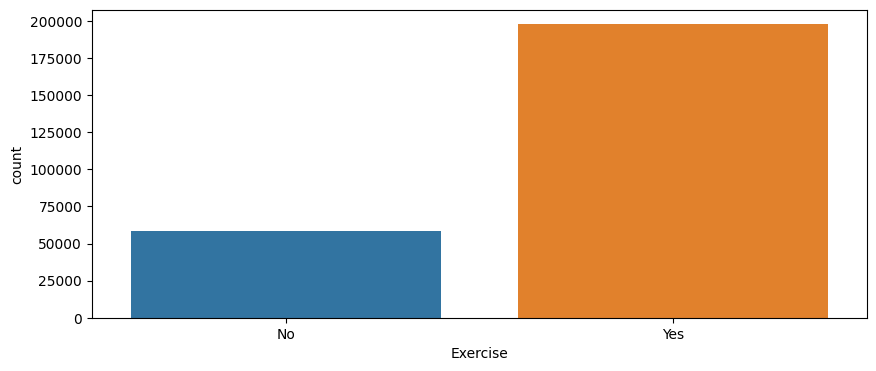

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df,x="Exercise")
plt.show()

In [ ]:
Exercise_sub =["No","Yes"]
for i in Exercise_sub:
  countc = df.loc[df["Exercise"]==i] [["Exercise"]].count()
  average=(countc*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  No Exercise    22
dtype: int64
Percentage of  Yes Exercise    77
dtype: int64


**Observations:**

* Majority of people do exercises.
* Percentage of "No Exercise" is 22%
* Percentage of reviewers with Exercise is 77%

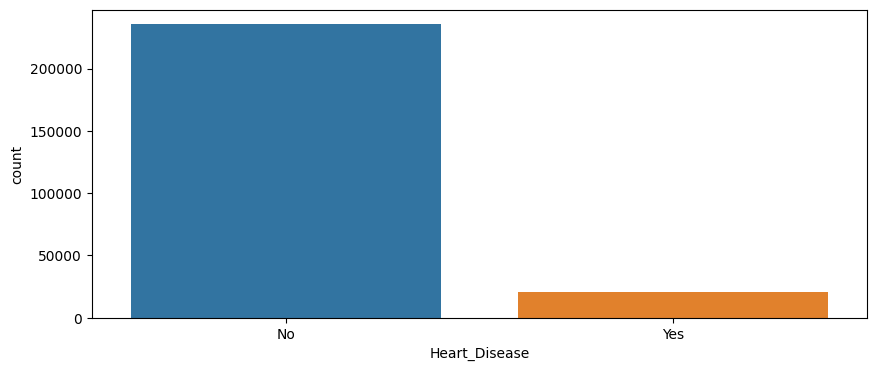

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df,x="Heart_Disease")
plt.show()

In [ ]:
Heart_Disease_sub =["No","Yes"]
for i in Heart_Disease_sub:
  countc = df.loc[df["Heart_Disease"]==i] [["Heart_Disease"]].count()
  average=(countc*100)//len(df)
  print("Percentage of ",i,average)
  print(countc)

Percentage of  No Heart_Disease    91
dtype: int64
Heart_Disease    235561
dtype: int64
Percentage of  Yes Heart_Disease    8
dtype: int64
Heart_Disease    20701
dtype: int64


**Observations**

* Percentage of no heart disease 91%
* Percentage of people with heart disease 8%

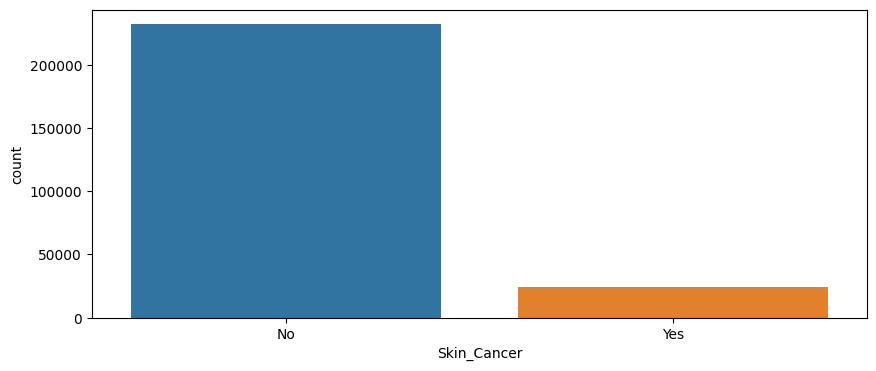

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df,x="Skin_Cancer")
plt.show()

In [ ]:
Skin_Cancer_sub =["No","Yes"]
for i in Skin_Cancer_sub:
  countc = df.loc[df["Skin_Cancer"]==i] [["Skin_Cancer"]].count()
  average=(countc*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  No Skin_Cancer    90
dtype: int64
Percentage of  Yes Skin_Cancer    9
dtype: int64


**Observations:**

* Percentage of pearsons with No Skin_Cancer 90%
* Percentage of diseased 9%
*

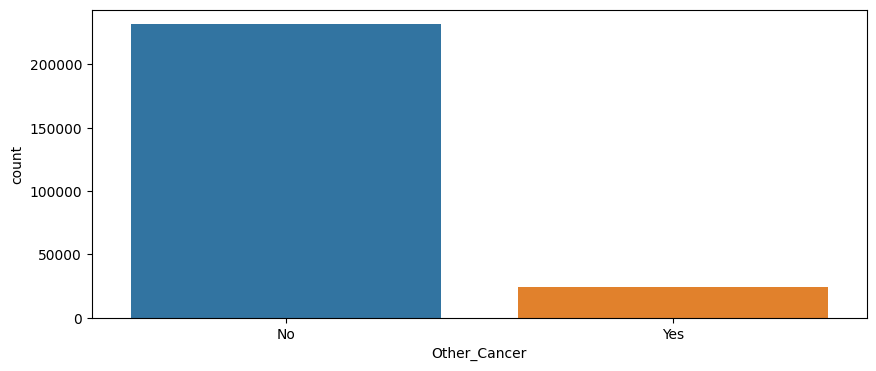

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df,x="Other_Cancer")
plt.show()

In [ ]:
Other_Cancer_sub=["No","Yes"]
for i in Other_Cancer_sub:
  countO = df.loc[df["Other_Cancer"]==i] [["Other_Cancer"]].count()
  average=(countO*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  No Other_Cancer    90
dtype: int64
Percentage of  Yes Other_Cancer    9
dtype: int64


**Observations:**

* Percentage of patients with No other_Cancer 90%
* Percentage of diseased 9%

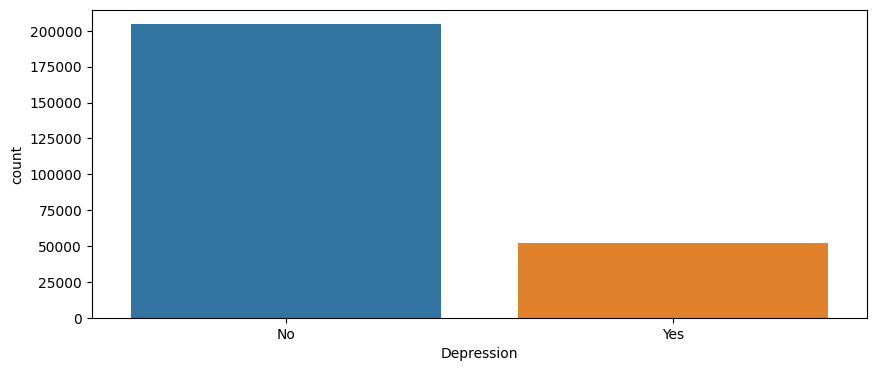

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df,x="Depression")
plt.show()

In [ ]:
Depression_sub=["No","Yes"]
for i in Depression_sub:
  countd = df.loc[df["Depression"]==i] [["Depression"]].count()
  average=(countd*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  No Depression    79
dtype: int64
Percentage of  Yes Depression    20
dtype: int64


**Observations:**

* Percentage of pearsons with no depression 79%
* Percentage of patients with depression: 20%

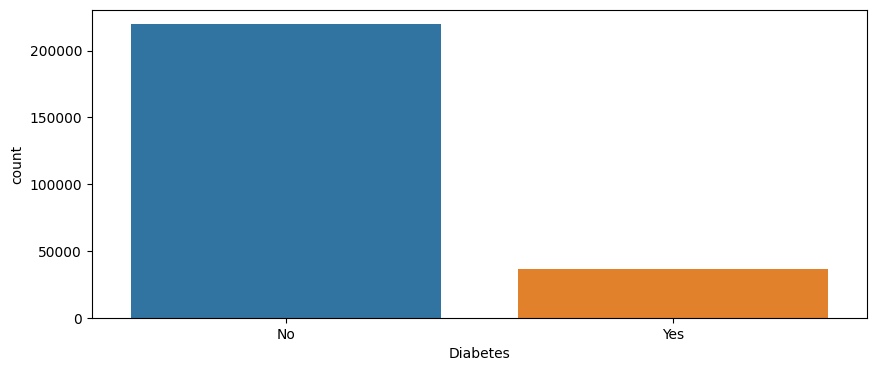

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df,x="Diabetes")
plt.show()

In [ ]:
Diabetes_sub=["No","Yes"]
for i in Diabetes_sub:
  countd = df.loc[df["Diabetes"]==i] [["Diabetes"]].count()
  average=(countd*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  No Diabetes    85
dtype: int64
Percentage of  Yes Diabetes    14
dtype: int64


**Observations:**

* Most patients do not have Diabetes and the percentage is:85%
* Percentage of patients with diabetes is:14%

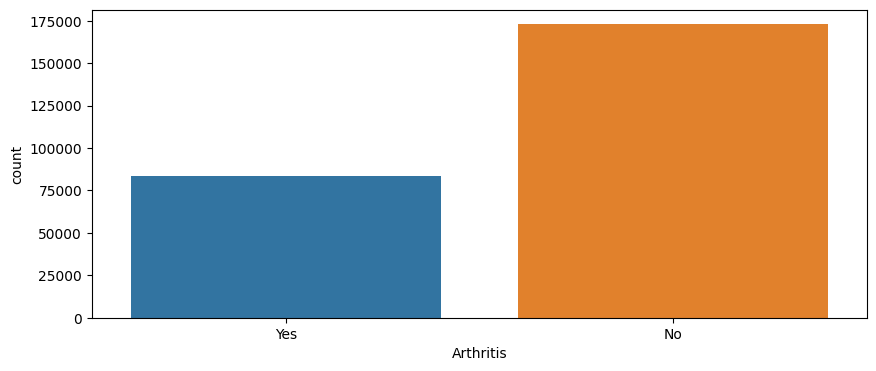

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df,x="Arthritis")
plt.show()

In [ ]:
Arthritis_sub=["No","Yes"]
for i in Arthritis_sub:
  countd = df.loc[df["Arthritis"]==i] [["Arthritis"]].count()
  average=(countd*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  No Arthritis    67
dtype: int64
Percentage of  Yes Arthritis    32
dtype: int64


* Majority of reviewers do not have Arthritis,the percentage is 67%
* Only 32% of patients suffer from arthrities.

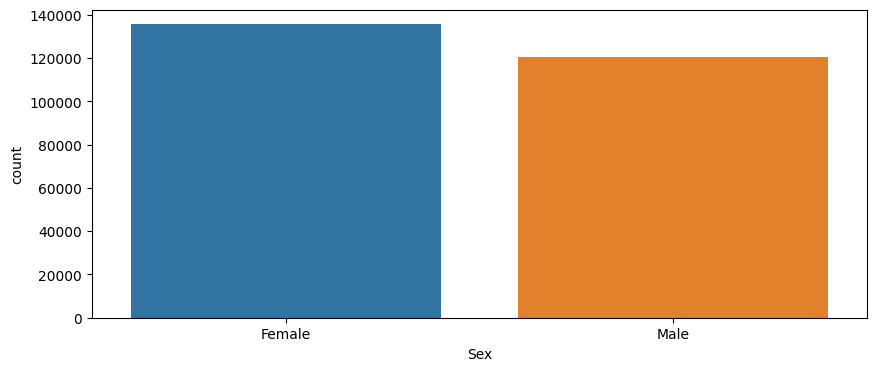

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df,x="Sex")
plt.show()

In [ ]:
Sex_sub=["Female","Male"]
for i in Sex_sub:
  counts = df.loc[df["Sex"]==i] [["Sex"]].count()
  average=(counts*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  Female Sex    52
dtype: int64
Percentage of  Male Sex    47
dtype: int64


**Observations**

* Percentage of Females 52%
* Percentage of Males 47%
* Gender is balanced

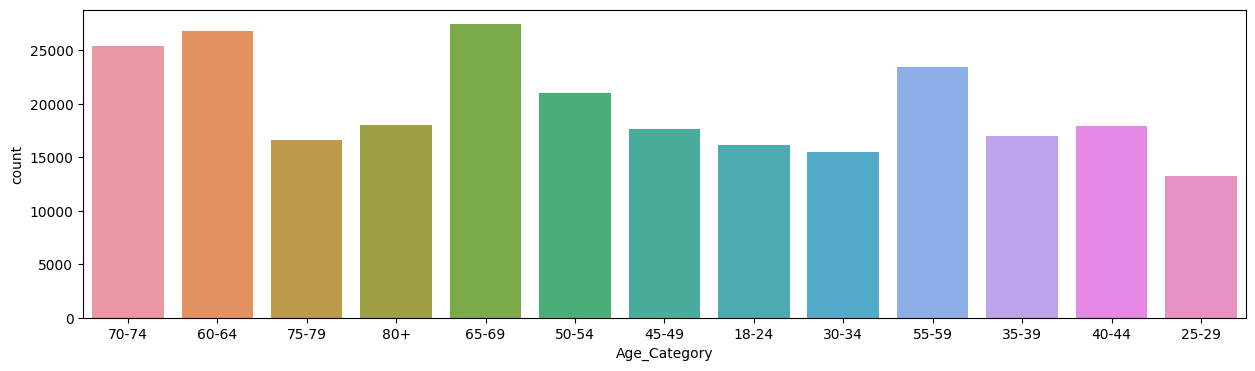

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df,x="Age_Category")
plt.show()

In [ ]:
df["Age_Category"].unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [ ]:
Age_Category_sub=['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49','18-24', '30-34', '55-59', '35-39', '40-44', '25-29']
for i in Age_Category_sub:
  countd = df.loc[df["Age_Category"]==i] [["Age_Category"]].count()
  average=(countd*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  70-74 Age_Category    9
dtype: int64
Percentage of  60-64 Age_Category    10
dtype: int64
Percentage of  75-79 Age_Category    6
dtype: int64
Percentage of  80+ Age_Category    7
dtype: int64
Percentage of  65-69 Age_Category    10
dtype: int64
Percentage of  50-54 Age_Category    8
dtype: int64
Percentage of  45-49 Age_Category    6
dtype: int64
Percentage of  18-24 Age_Category    6
dtype: int64
Percentage of  30-34 Age_Category    6
dtype: int64
Percentage of  55-59 Age_Category    9
dtype: int64
Percentage of  35-39 Age_Category    6
dtype: int64
Percentage of  40-44 Age_Category    7
dtype: int64
Percentage of  25-29 Age_Category    5
dtype: int64


**Observations:**

1. Percentage of the 70-74 Age_Category is 10%.

2. Percentage of the 60-64 Age_Category is 10%.

3. Percentage of the 75-79 Age_Category is 6%.

4. Percentage of the 80+ Age_Category is 7%.

5. Percentage of the 65-69 Age_Category is 10%.

6. Percentage of the 50-54 Age_Category is 8%.

7. Percentage of the 45-49 Age_Category is 6%.

8. Percentage of the 18-24 Age_Category is 6%.

9. Percentage of the 30-34 Age_Category is 5%.

10. Percentage of the 55-59 Age_Category is 9%.

11. Percentage of the 35-39 Age_Category is 6%.

12. Percentage of the 40-44 Age_Category is 6%.

13. Percentage of the 25-29 Age_Category is 5%.



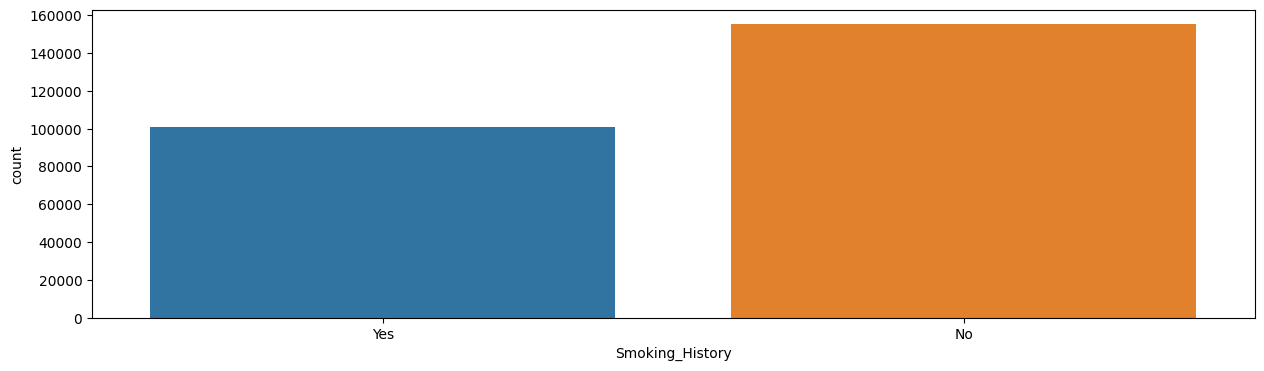

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df,x="Smoking_History")
plt.show()

In [ ]:
Smoking_History_sub=["No","Yes"]
for i in Smoking_History_sub:
  countS = df.loc[df["Smoking_History"]==i] [["Smoking_History"]].count()
  average=(countS*100)//len(df)
  print("Percentage of ",i,average)

Percentage of  No Smoking_History    60
dtype: int64
Percentage of  Yes Smoking_History    39
dtype: int64


**Observations:**

1. Percentage of patients with no smoking history is 58%.
2. Percentage of patients with smoking history is 41%.

# **Analysis of Disease Conditions and Corresponding Factors**

**Heart Disease Vs Factors**

1.Relationship between Heart_Disease General_Health

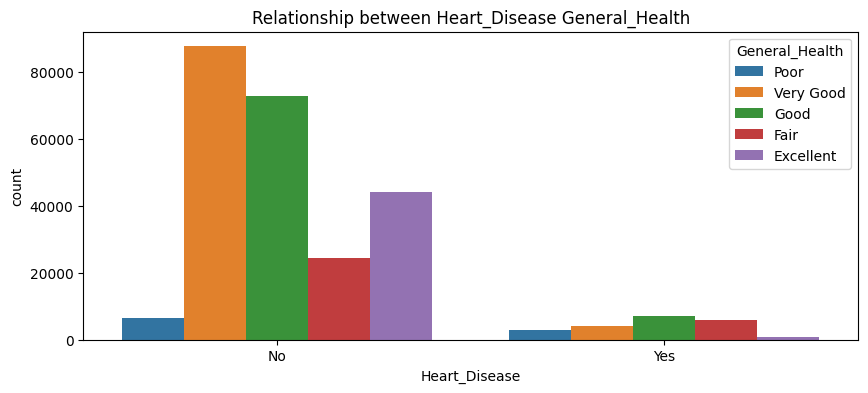

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Heart_Disease", hue="General_Health")
plt.title("Relationship between Heart_Disease General_Health")
plt.show()

In [ ]:
print("Details about reviewers with Heart_Disease, based on General_Health")
print("-"*75)
lst_G=['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']
for i in lst_G:
    data = len(df.loc[(df["General_Health"]==i)])
    data1 = len(df.loc[(df["Heart_Disease"] == "Yes") & (df["General_Health"] == i)])
    percentage = (data1 * 100) // data
    print(percentage, "% of reviewers come under general health ",i," and with heart disorder ")

Details about reviewers with Heart_Disease, based on General_Health
---------------------------------------------------------------------------
31 % of reviewers come under general health  Poor  and with heart disorder 
4 % of reviewers come under general health  Very Good  and with heart disorder 
8 % of reviewers come under general health  Good  and with heart disorder 
19 % of reviewers come under general health  Fair  and with heart disorder 
1 % of reviewers come under general health  Excellent  and with heart disorder 


**Observation:**

* Heart disorder is higher in reviewers with poor health conditions




2.Relationship between Exercise and Heart_Disease




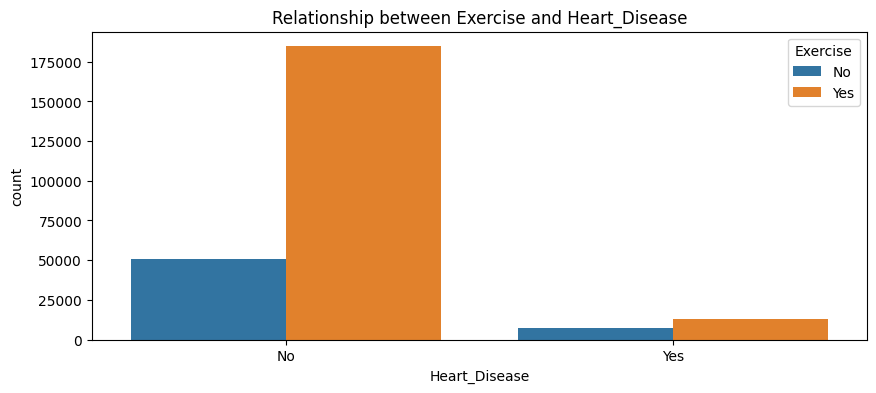

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Heart_Disease", hue="Exercise")
plt.title("Relationship between Exercise and Heart_Disease")
plt.show()

In [ ]:
print("Details about reviewers with Heart_Disease, based on Exercise")
print("-"*75)
lst_E=["Yes","No"]
for i in lst_E:
    datae = len(df.loc[(df["Exercise"]==i)])
    data1e = len(df.loc[(df["Heart_Disease"] == "Yes") & (df["Exercise"] == i)])
    percentage = (data1e * 100) // datae
    print(percentage, "% of reviewers with exercise ",i," and having heart disorder ")

Details about reviewers with Heart_Disease, based on Exercise
---------------------------------------------------------------------------
6 % of reviewers with exercise  Yes  and having heart disorder 
12 % of reviewers with exercise  No  and having heart disorder 


**Observation:**
* Chances of heart failure is double for people who dont do any exercises or activities

3.Relationship between Sex and Heart_Disease

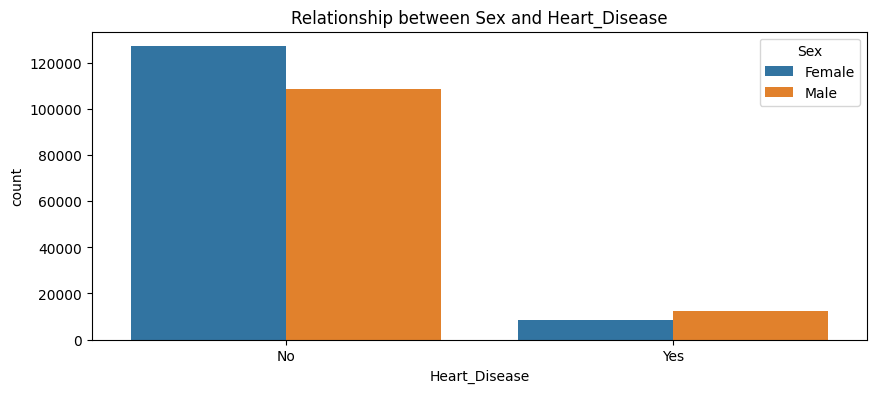

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Heart_Disease", hue="Sex")
plt.title("Relationship between Sex and Heart_Disease")
plt.show()

In [ ]:
print("Details about reviewers with Heart_Disease, based on Sex")
print("-"*75)
lst_S=["Male","Female"]
for i in lst_S:
    datas = len(df.loc[(df["Sex"]==i)])
    data1s = len(df.loc[(df["Heart_Disease"] == "Yes") & (df["Sex"] == i)])
    percentages = (data1s * 100) // datas
    print(percentages, "% of reviewers with heart disorder come under Sex ",i)

Details about reviewers with Heart_Disease, based on Sex
---------------------------------------------------------------------------
10 % of reviewers with heart disorder come under Sex  Male
6 % of reviewers with heart disorder come under Sex  Female


**Observation:**
* 10 percentage of males have heart disorders
* 6 percentage of females have heart disorders
* Chances of heart failure for male is higher than females

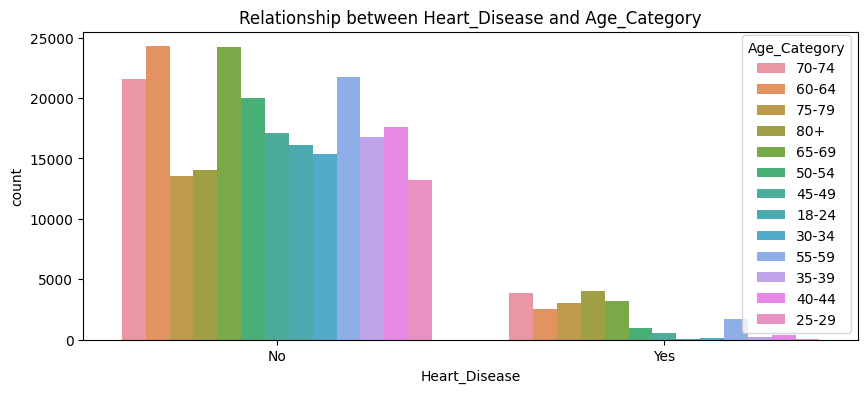

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Heart_Disease", hue="Age_Category")
plt.title("Relationship between Heart_Disease and Age_Category")
plt.show()

In [ ]:
age_cat = df.loc[df["Heart_Disease"]=="Yes"].groupby("Age_Category") ["Heart_Disease"].count().sort_values(ascending=False)
age_cat

Age_Category
80+      4031
70-74    3826
65-69    3199
75-79    3067
60-64    2503
55-59    1670
50-54     970
45-49     557
40-44     349
35-39     223
30-34     161
25-29      79
18-24      66
Name: Heart_Disease, dtype: int64

In [ ]:
print("Details about reviewers with Heart_Disease based on Age_Category")
print("-"*75)
lst_A=['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49','18-24', '30-34', '55-59', '35-39', '40-44', '25-29']
for i in lst_A:
    datasc= len(df.loc[(df["Age_Category"]==i)])
    data1sc = len(df[(df["Heart_Disease"] == "Yes") & (df["Age_Category"] == i)])
    percentageoc = (data1sc * 100) // datasc
    print(percentageoc, "%  Age_Category ",i,)

Details about reviewers with Heart_Disease based on Age_Category
---------------------------------------------------------------------------
15 %  Age_Category  70-74
9 %  Age_Category  60-64
18 %  Age_Category  75-79
22 %  Age_Category  80+
11 %  Age_Category  65-69
4 %  Age_Category  50-54
3 %  Age_Category  45-49
0 %  Age_Category  18-24
1 %  Age_Category  30-34
7 %  Age_Category  55-59
1 %  Age_Category  35-39
1 %  Age_Category  40-44
0 %  Age_Category  25-29


**Observation:**
* Chances of heart disorder is higher in higher age groups compared to lower age groups


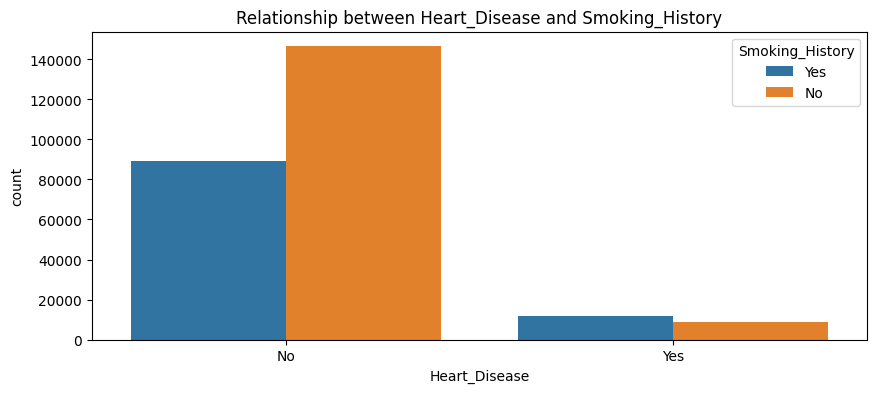

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Heart_Disease", hue="Smoking_History")
plt.title("Relationship between Heart_Disease and Smoking_History")
plt.show()

In [ ]:
print("Details about reviewers with Heart_Disease based on Smoking_History")
print("-"*75)
lst_SH=["Yes","No"]
for i in lst_SH:
    datash = len(df.loc[(df["Smoking_History"]==i)])
    data1sh = len(df.loc[(df["Heart_Disease"] == "Yes") & (df["Exercise"] == i)])
    percentage = (data1sh * 100) // datash
    print(percentage, "% of reviewers with heart disease and Smoking_History ",i)

Details about reviewers with Heart_Disease based on Smoking_History
---------------------------------------------------------------------------
12 % of reviewers with heart disease and Smoking_History  Yes
4 % of reviewers with heart disease and Smoking_History  No


Observation:
* heart disorder rate is 3 times  more in people with smoking history

**Skin_cancer and variables**

1.Relationship between Skin_Cancer and General_Health

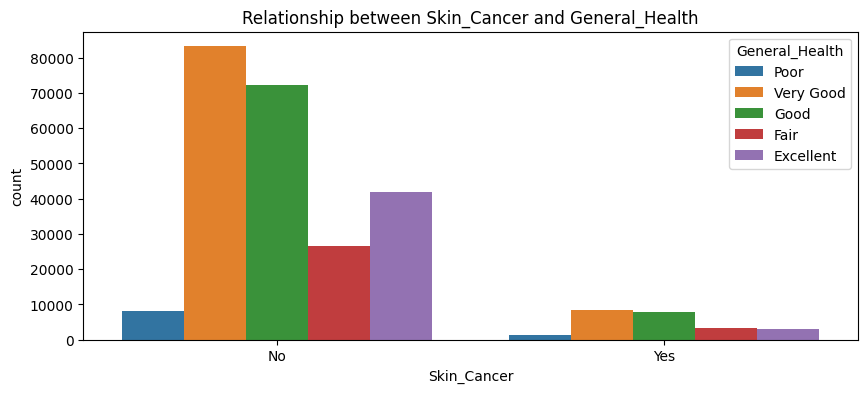

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Skin_Cancer", hue="General_Health")
plt.title("Relationship between Skin_Cancer and General_Health")
plt.show()

In [ ]:
print("Percentage of reviewers with Skin_Cancer based on General Health")
print("-"*75)
lst_G=['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']
for i in lst_G:
    data = len(df.loc[(df["General_Health"]==i)])
    data1sc = len(df.loc[(df["Skin_Cancer"] == "Yes") & (df["General_Health"] == i)])
    percentagesc = (data1sc * 100) // data
    print(percentagesc, "% come under General Health",i,"category")

Percentage of reviewers with Skin_Cancer based on General Health
---------------------------------------------------------------------------
14 % come under General Health Poor category
9 % come under General Health Very Good category
9 % come under General Health Good category
11 % come under General Health Fair category
6 % come under General Health Excellent category


Observation:
* Skin cancer is more common in patients who rate their general health as Good,fair or poor

2.Relationship between Skin_Cancer and Exercise

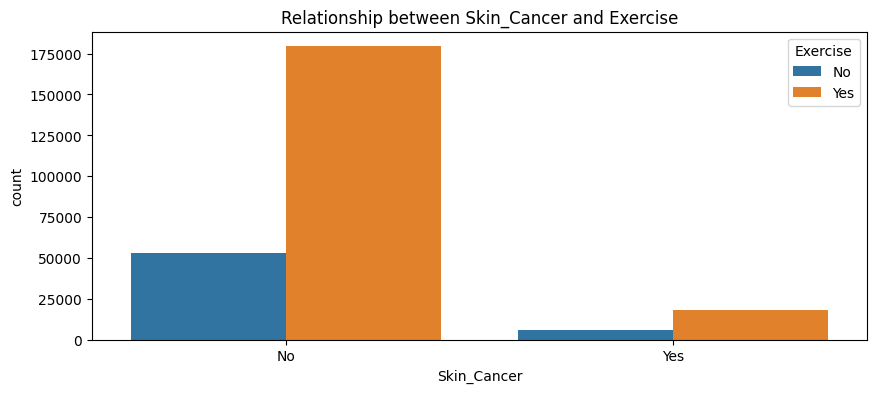

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Skin_Cancer", hue="Exercise")
plt.title("Relationship between Skin_Cancer and Exercise")
plt.show()

In [ ]:
print("Details about reviewers with Skin_Cancer based on Exercise")
print("-"*75)
lst_E=["Yes","No"]
for i in lst_E:
    datasce = len(df.loc[(df["Exercise"]==i)])
    data1sce = len(df.loc[(df["Skin_Cancer"] == "Yes") & (df["Exercise"] == i)])
    percentage = (data1sce * 100) // datasce
    print(percentage, "%  exercise ",i,)

Details about reviewers with Skin_Cancer based on Exercise
---------------------------------------------------------------------------
9 %  exercise  Yes
9 %  exercise  No


Observation:
* Exercise have no relevance in skin cancer

3.Relationship between Skin_Cancer and Sex

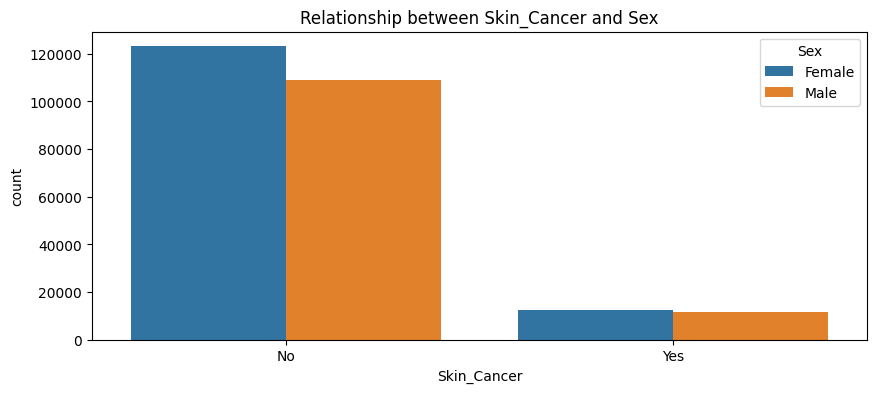

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Skin_Cancer", hue="Sex")
plt.title("Relationship between Skin_Cancer and Sex")
plt.show()

In [ ]:
print("Details about reviewers with Skin_Cancer based on Sex")
print("-"*75)
lst_S=["Male","Female"]
for i in lst_S:
    datasc = len(df.loc[(df["Sex"]==i)])
    data1sc = len(df.loc[(df["Skin_Cancer"] == "Yes") & (df["Sex"] == i)])
    percentages = (data1sc * 100) // datasc
    print(percentages, "% of are ",i)

Details about reviewers with Skin_Cancer based on Sex
---------------------------------------------------------------------------
9 % of are  Male
9 % of are  Female


4.Relationship between Skin_Cancer and Age_Category

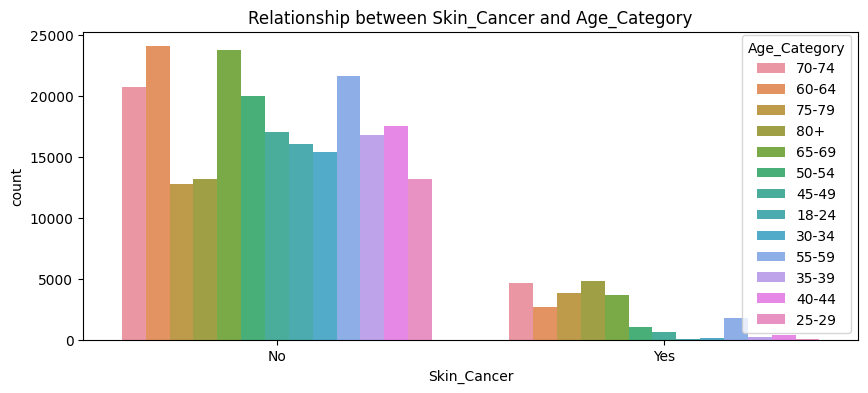

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Skin_Cancer", hue="Age_Category")
plt.title("Relationship between Skin_Cancer and Age_Category")
plt.show()

In [ ]:
age_cats = df.loc[df["Skin_Cancer"]=="Yes"].groupby("Age_Category") ["Skin_Cancer"].count().sort_values(ascending=False)
age_cats

Age_Category
80+      4837
70-74    4683
75-79    3854
65-69    3664
60-64    2707
55-59    1789
50-54    1026
45-49     600
40-44     412
35-39     230
30-34     112
25-29      74
18-24      43
Name: Skin_Cancer, dtype: int64

In [ ]:
print("Details about reviewers with Skin_Cancer based on Age_Category")
print("-"*75)
lst_A=['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49','18-24', '30-34', '55-59', '35-39', '40-44', '25-29']
for i in lst_A:
    datasc= len(df.loc[(df["Age_Category"]==i)])
    data1sc = len(df.loc[(df["Skin_Cancer"] == "Yes") & (df["Age_Category"] == i)])
    percentageoc = (data1sc * 100) // datasc
    print(percentageoc, "%  Age_Category ",i,)

Details about reviewers with Skin_Cancer based on Age_Category
---------------------------------------------------------------------------
18 %  Age_Category  70-74
10 %  Age_Category  60-64
23 %  Age_Category  75-79
26 %  Age_Category  80+
13 %  Age_Category  65-69
4 %  Age_Category  50-54
3 %  Age_Category  45-49
0 %  Age_Category  18-24
0 %  Age_Category  30-34
7 %  Age_Category  55-59
1 %  Age_Category  35-39
2 %  Age_Category  40-44
0 %  Age_Category  25-29


**Observation:**
* Chances of skin cancer is higher in higher age groups compared to lower age groups



5.Relationship between Skin_Cancer and Smoking_History

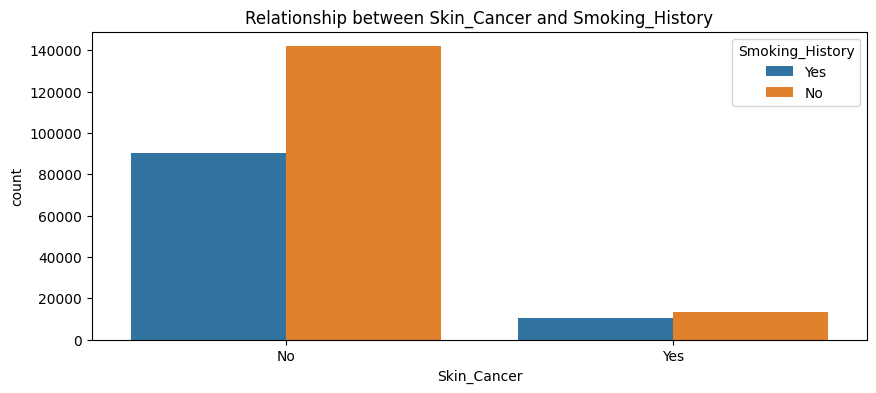

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Skin_Cancer", hue="Smoking_History")
plt.title("Relationship between Skin_Cancer and Smoking_History")
plt.show()

In [ ]:
print("Details about reviewers with Skin_Cancer based on Smoking_History")
print("-"*75)
lst_SH=["Yes","No"]
for i in lst_SH:
    datash = len(df.loc[(df["Smoking_History"]==i)])
    data1sh = len(df.loc[(df["Skin_Cancer"] == "Yes") & (df["Smoking_History"] == i)])
    percentage = (data1sh * 100) // datash
    print(percentage, "% of reviewers with heart disease and Smoking_History ",i)

Details about reviewers with Skin_Cancer based on Smoking_History
---------------------------------------------------------------------------
10 % of reviewers with heart disease and Smoking_History  Yes
8 % of reviewers with heart disease and Smoking_History  No


**Observation:**
* Smoking increases the chances for skin cancer

**Other_Cancer Vs variables**

1.Relationship between Other_Cancer and General_Health

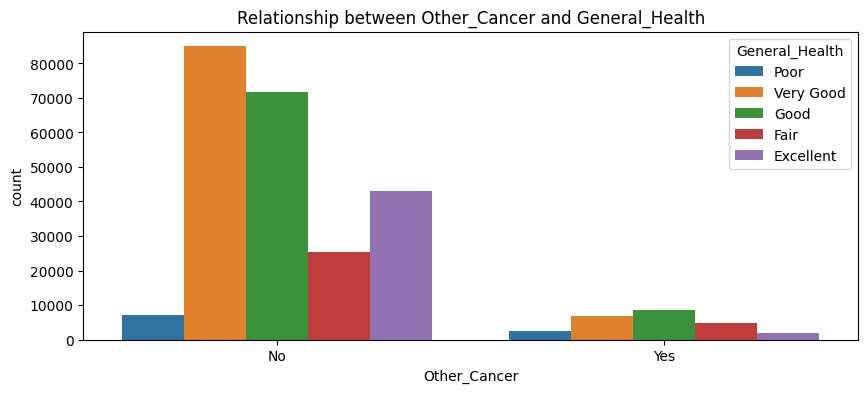

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Other_Cancer", hue="General_Health")
plt.title("Relationship between Other_Cancer and General_Health")
plt.show()

In [ ]:
print("Percentage of reviewers with Skin_Cancer based on General Health")
print("-"*75)
lst_G=['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']
for i in lst_G:
    data = len(df.loc[(df["General_Health"]==i)])
    data1sc = len(df.loc[(df["Other_Cancer"] == "Yes") & (df["General_Health"] == i)])
    percentagesc = (data1sc * 100) // data
    print(percentagesc, "% come under General Health",i,"category")

Percentage of reviewers with Skin_Cancer based on General Health
---------------------------------------------------------------------------
25 % come under General Health Poor category
7 % come under General Health Very Good category
10 % come under General Health Good category
15 % come under General Health Fair category
4 % come under General Health Excellent category


**Observation:**
* Other cancers are more  in patients who rate their general health as "Poor" or "Fair"

2.Relationship between Other_Cancer and Exercise

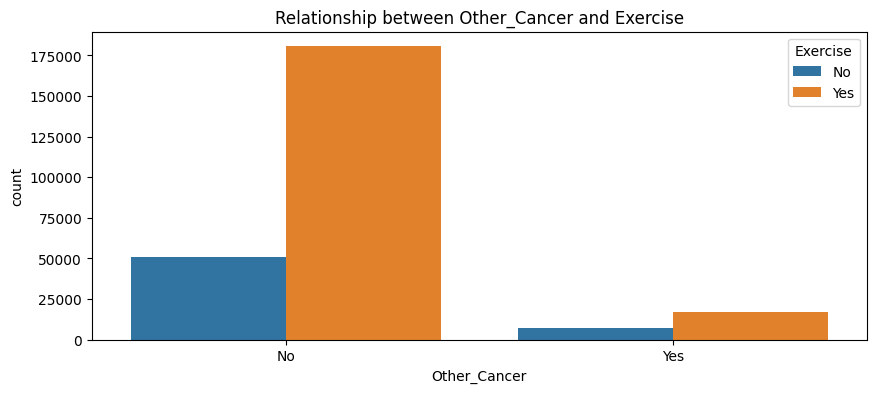

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Other_Cancer", hue="Exercise")
plt.title("Relationship between Other_Cancer and Exercise")
plt.show()

In [ ]:
print("Details about reviewers with Other_Cancer based on Exercise")
print("-"*75)
lst_E=["Yes","No"]
for i in lst_E:
    datasce = len(df.loc[(df["Exercise"]==i)])
    data1sce = len(df.loc[(df["Other_Cancer"] == "Yes") & (df["Exercise"] == i)])
    percentage = (data1sce * 100) // datasce
    print(percentage, "%  exercise ",i,)

Details about reviewers with Other_Cancer based on Exercise
---------------------------------------------------------------------------
8 %  exercise  Yes
12 %  exercise  No


Observation:
* Other type of cancer is slightly more common in patients who do not exercise

3.Relationship between Other_Cancer and Sex

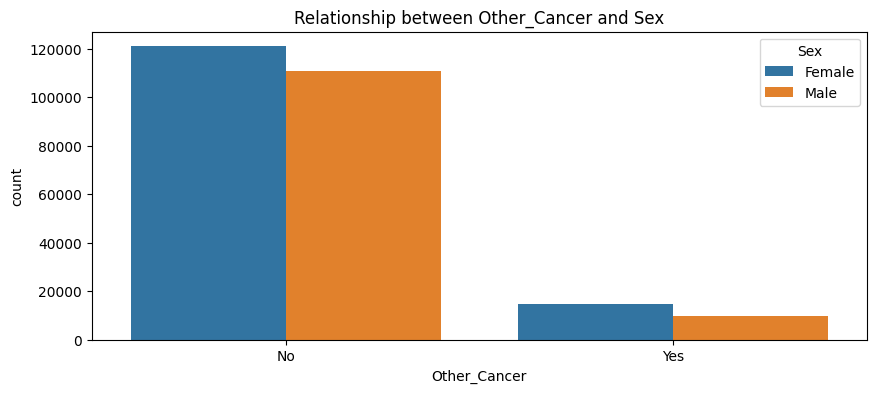

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Other_Cancer", hue="Sex")
plt.title("Relationship between Other_Cancer and Sex")
plt.show()

In [ ]:
print("Details about reviewers with Other_Cancer based on Sex")
print("-"*75)
lst_S=["Male","Female"]
for i in lst_S:
    dataoc= len(df.loc[(df["Sex"]==i)])
    data1oc = len(df.loc[(df["Other_Cancer"] == "Yes") & (df["Sex"] == i)])
    percentageoc = (data1oc * 100) // dataoc
    print(percentageoc, "%  sex ",i,)

Details about reviewers with Other_Cancer based on Sex
---------------------------------------------------------------------------
8 %  sex  Male
10 %  sex  Female


Observation:
* Other type of cancer is slightly more in females

4.Relationship between Other_Cancer and Age_Category

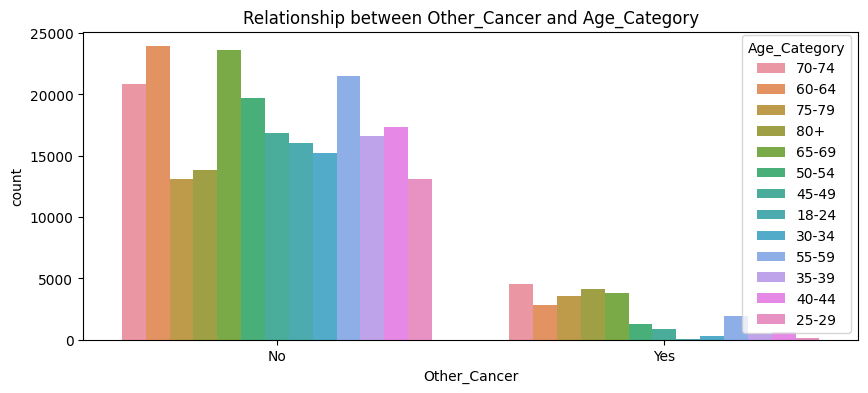

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Other_Cancer", hue="Age_Category")
plt.title("Relationship between Other_Cancer and Age_Category")
plt.show()

In [ ]:
age_cato = df.loc[df["Other_Cancer"]=="Yes"].groupby("Age_Category") ["Other_Cancer"].count().sort_values(ascending=False)
age_cato

Age_Category
70-74    4565
80+      4166
65-69    3832
75-79    3516
60-64    2862
55-59    1920
50-54    1281
45-49     826
40-44     609
35-39     435
30-34     280
25-29     138
18-24      85
Name: Other_Cancer, dtype: int64

In [ ]:
print("Details about reviewers with Other_Cancer based on Age_Category")
print("-"*75)
lst_A=['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49','18-24', '30-34', '55-59', '35-39', '40-44', '25-29']
for i in lst_A:
    dataoc= len(df.loc[(df["Age_Category"]==i)])
    data1oc = len(df.loc[(df["Other_Cancer"] == "Yes") & (df["Age_Category"] == i)])
    percentageoc = (data1oc * 100) // dataoc
    print(percentageoc, "%  Age_Category ",i,)

Details about reviewers with Other_Cancer based on Age_Category
---------------------------------------------------------------------------
17 %  Age_Category  70-74
10 %  Age_Category  60-64
21 %  Age_Category  75-79
23 %  Age_Category  80+
13 %  Age_Category  65-69
6 %  Age_Category  50-54
4 %  Age_Category  45-49
0 %  Age_Category  18-24
1 %  Age_Category  30-34
8 %  Age_Category  55-59
2 %  Age_Category  35-39
3 %  Age_Category  40-44
1 %  Age_Category  25-29


Observation:
* above 60-64 range other type of cancer is much higher.it is maximum above 80+

5.Relationship between Other_Cancer and Smoking_History

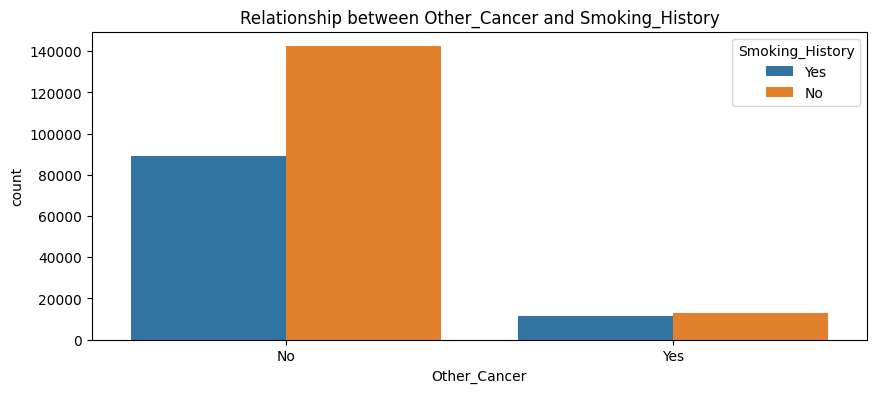

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Other_Cancer", hue="Smoking_History")
plt.title("Relationship between Other_Cancer and Smoking_History")
plt.show()

In [ ]:
print("Details about reviewers with Other_Cancer based on Smoking_History")
print("-"*75)
lst_S=["Yes","No"]
for i in lst_S:
    dataoc= len(df.loc[(df["Smoking_History"]==i)])
    data1oc = len(df.loc[(df["Other_Cancer"] == "Yes") & (df["Smoking_History"] == i)])
    percentageoc = (data1oc * 100) // dataoc
    print(percentageoc, "%  Smoking_History ",i)

Details about reviewers with Other_Cancer based on Smoking_History
---------------------------------------------------------------------------
11 %  Smoking_History  Yes
8 %  Smoking_History  No


Observation:
* Other cancers are more common in patients with a history of smoking

**Diabetes Vs Variables**

1.Relationship between Diabetes and General_Health

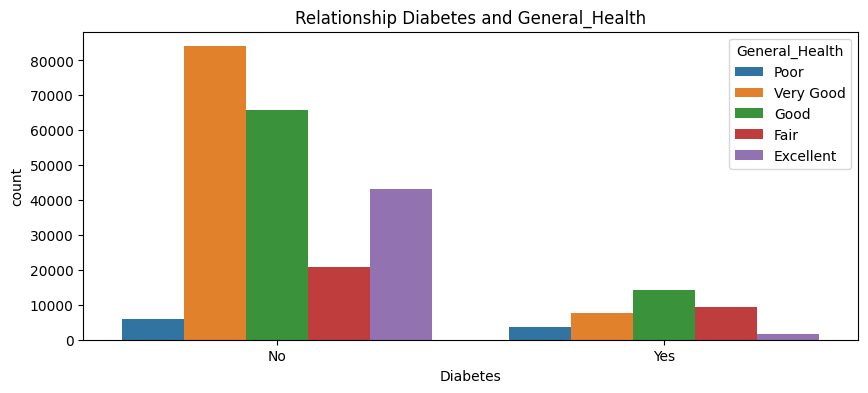

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Diabetes", hue="General_Health")
plt.title("Relationship Diabetes and General_Health")
plt.show()

In [ ]:
print("Details about reviewers with Diabetes based on General_Health")
print("-"*75)
lst_G=['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']
for i in lst_G:
    datadg= len(df.loc[(df["General_Health"]==i)])
    data1dg = len(df.loc[(df["Diabetes"] == "Yes") & (df["General_Health"] == i)])
    percentdg = (data1dg * 100) // datadg
    print(percentdg, "%  General_Health ",i)

Details about reviewers with Diabetes based on General_Health
---------------------------------------------------------------------------
37 %  General_Health  Poor
8 %  General_Health  Very Good
17 %  General_Health  Good
30 %  General_Health  Fair
3 %  General_Health  Excellent


Observation:
* Diabetes is higher in people with health conditions poor & fair categories


2.Relationship between Diabetes and Exercise

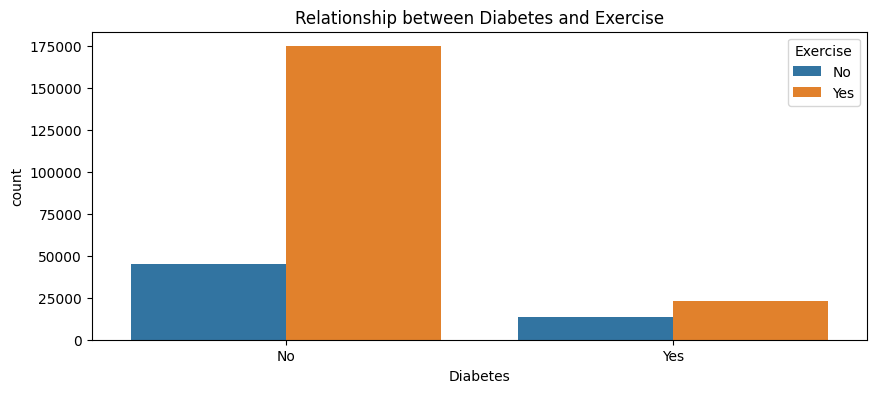

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Diabetes", hue="Exercise")
plt.title("Relationship between Diabetes and Exercise")
plt.show()

In [ ]:
print("Details about reviewers with Diabetes based on Exercise")
print("-"*75)
lst_G=["Yes","No"]
for i in lst_G:
    datadg= len(df.loc[(df["Exercise"]==i)])
    data1dg = len(df[(df["Diabetes"] == "Yes") & (df["Exercise"] == i)])
    percentdg = (data1dg * 100) // datadg
    print(percentdg, "%  Exercise ",i)

Details about reviewers with Diabetes based on Exercise
---------------------------------------------------------------------------
11 %  Exercise  Yes
23 %  Exercise  No


Observation:
* Diabetes is twice as common among reviewers who don't exercise.

3.Relationship between Diabetes and Sex

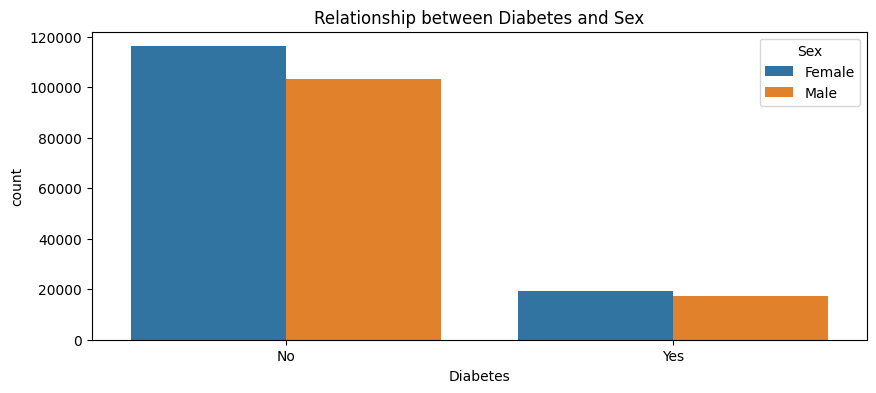

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Diabetes", hue="Sex")
plt.title("Relationship between Diabetes and Sex")
plt.show()

In [ ]:
print("Details about reviewers with Diabetes based on Sex")
print("-"*75)
lst_S=["Male","Female"]
for i in lst_S:
    datadg= len(df.loc[(df["Sex"]==i)])
    data1dg = len(df[(df["Diabetes"] == "Yes") & (df["Sex"] == i)])
    percentdg = (data1dg * 100) // datadg
    print(percentdg, "%  Sex ",i)

Details about reviewers with Diabetes based on Sex
---------------------------------------------------------------------------
14 %  Sex  Male
14 %  Sex  Female


Observation:
* There is not much difference in based on sex

4.Relationship between Diabetes and Age_Category

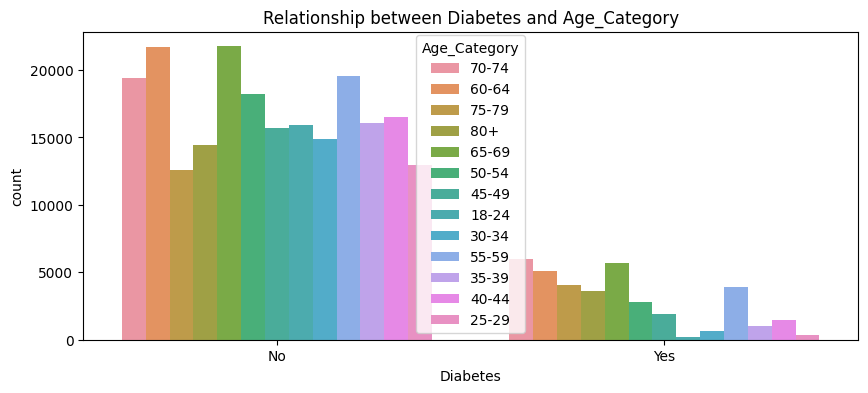

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Diabetes", hue="Age_Category")
plt.title("Relationship between Diabetes and Age_Category")
plt.show()

In [ ]:
age_cato1 = df.loc[df["Diabetes"]=="Yes"].groupby("Age_Category") ["Diabetes"].count().sort_values(ascending=False)
age_cato1

Age_Category
70-74    5961
65-69    5677
60-64    5072
75-79    4028
55-59    3907
80+      3601
50-54    2811
45-49    1939
40-44    1446
35-39     990
30-34     629
25-29     332
18-24     214
Name: Diabetes, dtype: int64

In [ ]:
print("Details about reviewers with Diabetes based on Age_Category")
print("-"*75)
lst_A=['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49','18-24', '30-34', '55-59', '35-39', '40-44', '25-29']
for i in lst_A:
    dataoc= len(df.loc[(df["Age_Category"]==i)])
    data1oc = len(df[(df["Diabetes"] == "Yes") & (df["Age_Category"] == i)])
    percentageoc = (data1oc * 100) // dataoc
    print(percentageoc, "%  Age_Category ",i,)

Details about reviewers with Diabetes based on Age_Category
---------------------------------------------------------------------------
23 %  Age_Category  70-74
18 %  Age_Category  60-64
24 %  Age_Category  75-79
19 %  Age_Category  80+
20 %  Age_Category  65-69
13 %  Age_Category  50-54
10 %  Age_Category  45-49
1 %  Age_Category  18-24
4 %  Age_Category  30-34
16 %  Age_Category  55-59
5 %  Age_Category  35-39
8 %  Age_Category  40-44
2 %  Age_Category  25-29


Observations:
* diabetes increases with age
* most common above 45++ age category
* Maximum above 70++

5.Relationship between Diabetes and Smoking_History

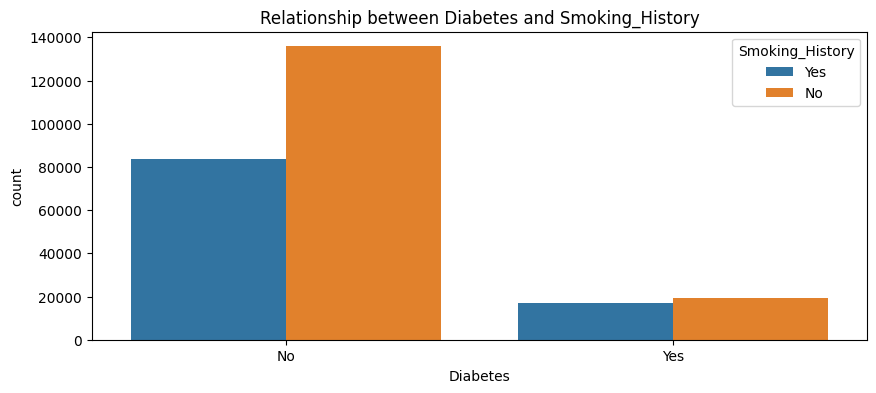

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Diabetes", hue="Smoking_History")
plt.title("Relationship between Diabetes and Smoking_History")
plt.show()

In [ ]:
print("Details about reviewers with Diabetes based on Smoking_History")
print("-"*75)
lst_S=["Yes","No"]
for i in lst_S:
    datadg= len(df.loc[(df["Smoking_History"]==i)])
    data1dg = len(df[(df["Diabetes"] == "Yes") & (df["Smoking_History"] == i)])
    percentdg = (data1dg * 100) // datadg
    print(percentdg, "%  Smoking_History ",i)

Details about reviewers with Diabetes based on Smoking_History
---------------------------------------------------------------------------
16 %  Smoking_History  Yes
12 %  Smoking_History  No


Observation:
* Diabetes is higher with patients with smoking history

**Arthritis Vs Variables**

1.Relationship between Arthritis and General_Health

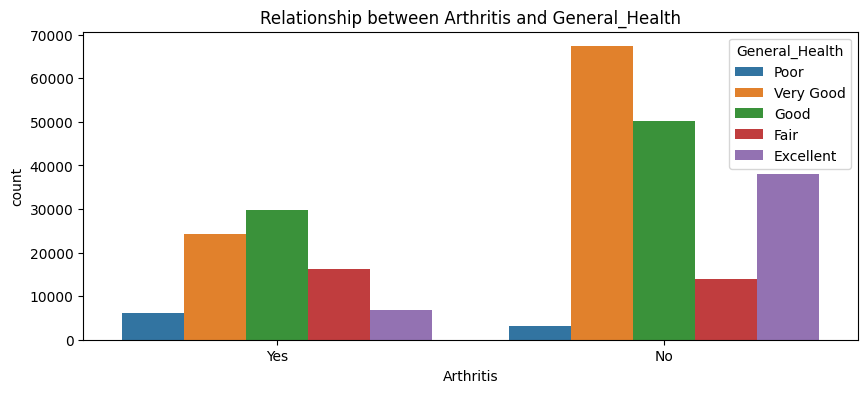

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Arthritis", hue="General_Health")
plt.title("Relationship between Arthritis and General_Health")
plt.show()

In [ ]:
print("Details about reviewers with Arthritis based on General_Health")
print("-"*75)
lst_G=['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']
for i in lst_G:
    data= len(df.loc[(df["General_Health"]==i)])
    data1 = len(df[(df["Arthritis"] == "Yes") & (df["General_Health"] == i)])
    percentage = (data1 * 100) // data
    print(percentage, "%  General_Health ",i)

Details about reviewers with Arthritis based on General_Health
---------------------------------------------------------------------------
65 %  General_Health  Poor
26 %  General_Health  Very Good
37 %  General_Health  Good
53 %  General_Health  Fair
15 %  General_Health  Excellent


2.Relationship between Arthritis and Exercise

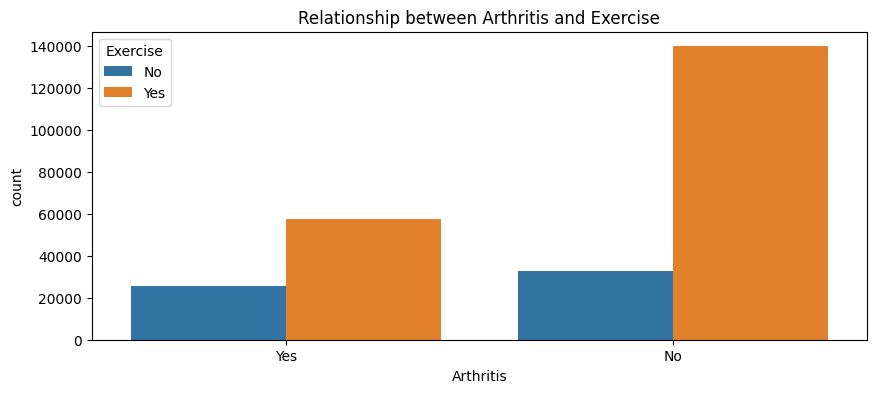

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Arthritis", hue="Exercise")
plt.title("Relationship between Arthritis and Exercise")
plt.show()

In [ ]:
print("Details about reviewers with Arthritis based on Exercise")
print("-"*75)
lst_A=["Yes","No"]
for i in lst_A:
    data= len(df.loc[(df["Exercise"]==i)])
    data1 = len(df[(df["Arthritis"] == "Yes") & (df["Exercise"] == i)])
    percentage = (data1 * 100) // data
    print(percentage, "%  Exercise ",i)

Details about reviewers with Arthritis based on Exercise
---------------------------------------------------------------------------
29 %  Exercise  Yes
43 %  Exercise  No


**Observation**

* Arthritis is 14 percentage higher among reviewers who don't exercise.

3.Relationship between Arthritis and Sex

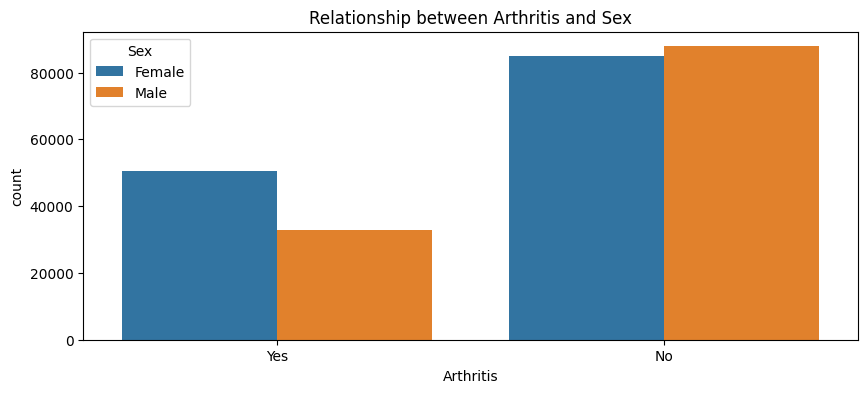

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Arthritis", hue="Sex")
plt.title("Relationship between Arthritis and Sex")
plt.show()

In [ ]:
print("Details about reviewers with Arthritis based on Sex")
print("-"*75)
lst_E=["Male","Female"]
for i in lst_E:
    data= len(df.loc[(df["Sex"]==i)])
    data1 = len(df[(df["Arthritis"] == "Yes") & (df["Sex"] == i)])
    percentage = (data1 * 100) // data
    print(percentage, "%  Sex ",i)

Details about reviewers with Arthritis based on Sex
---------------------------------------------------------------------------
27 %  Sex  Male
37 %  Sex  Female


* Arthritis is 10 percentage higher in females

4.Relationship between Arthritis and Age_Category

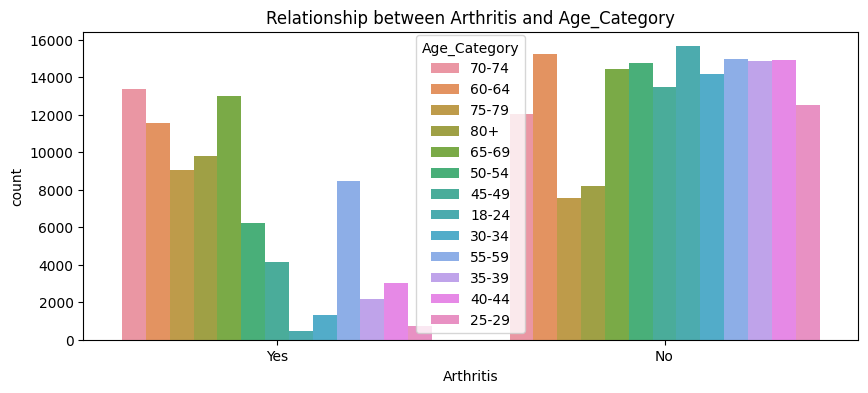

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Arthritis", hue="Age_Category")
plt.title("Relationship between Arthritis and Age_Category")
plt.show()

In [ ]:
age_cato4 = df.loc[df["Diabetes"]=="Yes"].groupby("Age_Category") ["Diabetes"].count().sort_values(ascending=False)
age_cato4

Age_Category
70-74    5961
65-69    5677
60-64    5072
75-79    4028
55-59    3907
80+      3601
50-54    2811
45-49    1939
40-44    1446
35-39     990
30-34     629
25-29     332
18-24     214
Name: Diabetes, dtype: int64

In [ ]:
print("Details about reviewers with Arthritis based on Age_Category")
print("-"*75)
lst_A=['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49','18-24', '30-34', '55-59', '35-39', '40-44', '25-29']
for i in lst_A:
    data= len(df.loc[(df["Age_Category"]==i)])
    data1 = len(df[(df["Arthritis"] == "Yes") & (df["Age_Category"] == i)])
    percentageoc = (data1oc * 100) // dataoc
    print(percentageoc, "%  Age_Category ",i,)

Details about reviewers with Arthritis based on Age_Category
---------------------------------------------------------------------------
2 %  Age_Category  70-74
2 %  Age_Category  60-64
2 %  Age_Category  75-79
2 %  Age_Category  80+
2 %  Age_Category  65-69
2 %  Age_Category  50-54
2 %  Age_Category  45-49
2 %  Age_Category  18-24
2 %  Age_Category  30-34
2 %  Age_Category  55-59
2 %  Age_Category  35-39
2 %  Age_Category  40-44
2 %  Age_Category  25-29


**5.Relationship between Arthritis and Smoking_History**

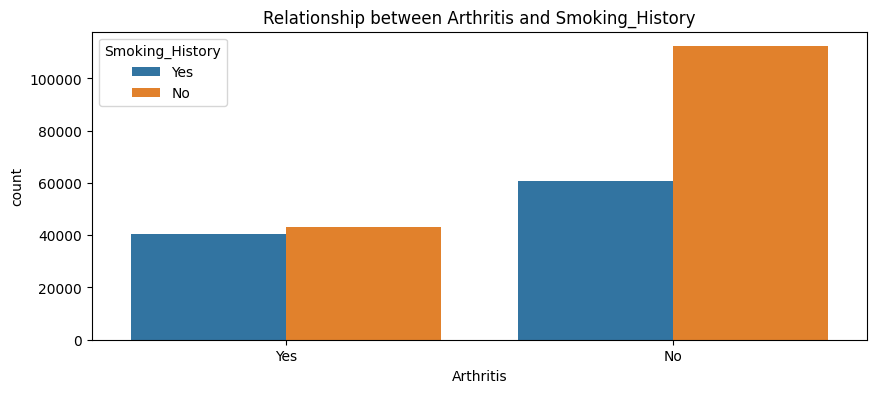

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Arthritis", hue="Smoking_History")
plt.title("Relationship between Arthritis and Smoking_History")
plt.show()

In [ ]:
print("Details about reviewers with Arthritis based on Smoking_History")
print("-"*75)
lst_E=["Yes","No"]
for i in lst_E:
    data= len(df.loc[(df["Smoking_History"]==i)])
    data1 = len(df[(df["Arthritis"] == "Yes") & (df["Smoking_History"] == i)])
    percentage = (data1 * 100) // data
    print(percentage, "%  Smoking_History ",i)

Details about reviewers with Arthritis based on Smoking_History
---------------------------------------------------------------------------
39 %  Smoking_History  Yes
27 %  Smoking_History  No


Observation:
* Arthritis is slightly higher in patients with a history of smoking.

**Depression Vs Factors**

Depression Vs General Health

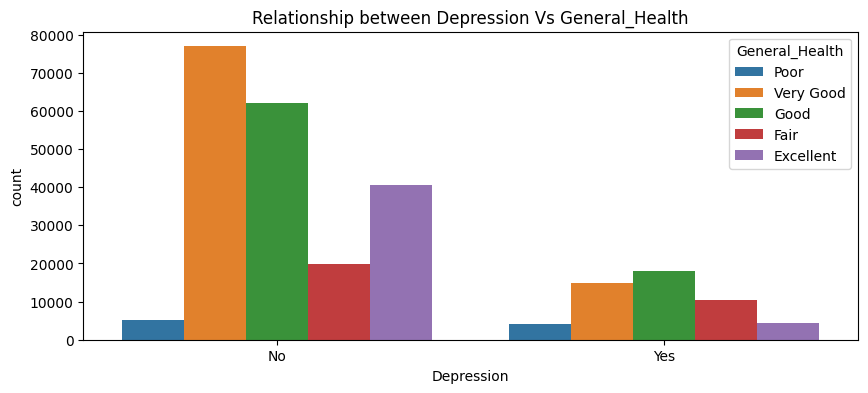

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Depression", hue="General_Health")
plt.title("Relationship between Depression Vs General_Health")
plt.show()

In [ ]:
print("Details about reviewers with Depression, based on General_Health")
print("-"*75)
lst_G=['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']
for i in lst_G:
    dataad = len(df.loc[(df["General_Health"]==i)])
    dataad1 = len(df.loc[(df["Depression"] == "Yes") & (df["General_Health"] == i)])
    percentage = (dataad1 * 100) // dataad
    print(percentage, "% of reviewers come under general health ",i," and with Depression ")


Details about reviewers with Depression, based on General_Health
---------------------------------------------------------------------------
44 % of reviewers come under general health  Poor  and with Depression 
16 % of reviewers come under general health  Very Good  and with Depression 
22 % of reviewers come under general health  Good  and with Depression 
34 % of reviewers come under general health  Fair  and with Depression 
9 % of reviewers come under general health  Excellent  and with Depression 


Relationship between Depression and Exercise

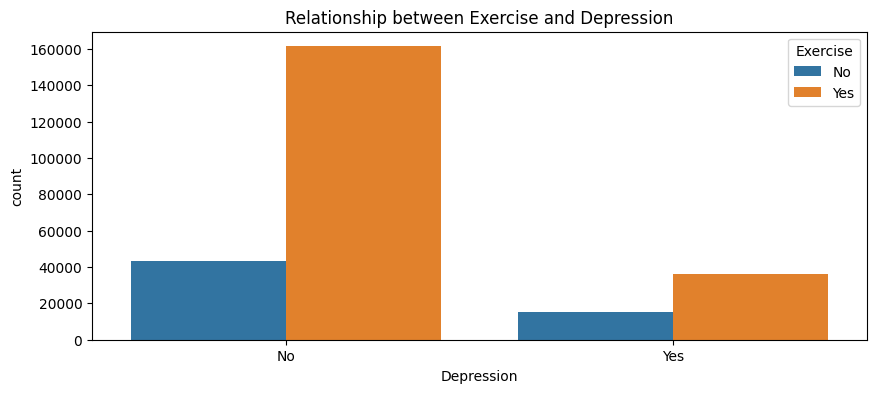

In [ ]:

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Depression", hue="Exercise")
plt.title("Relationship between Exercise and Depression")
plt.show()

In [ ]:

print("Details about reviewers with Depression, based on Exercise")
print("-"*75)
lst_E=["Yes","No"]
for i in lst_E:
    dataad = len(df.loc[(df["Exercise"]==i)])
    data1ad = len(df.loc[(df["Depression"] == "Yes") & (df["Exercise"] == i)])
    percentage = (data1ad * 100) // dataad
    print(percentage, "% of reviewers with exercise ",i," and having Depression ")

Details about reviewers with Depression, based on Exercise
---------------------------------------------------------------------------
18 % of reviewers with exercise  Yes  and having Depression 
26 % of reviewers with exercise  No  and having Depression 


**Observation**:

* Depression is lower in reviewers who do exercises

Relationship between Depression and Sex

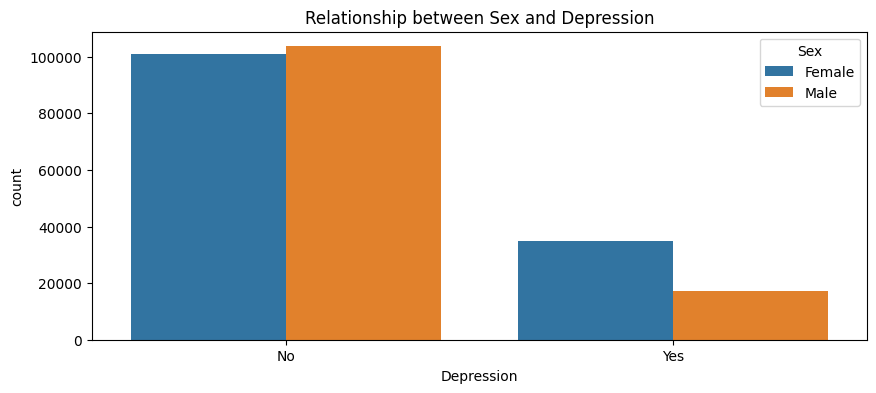

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Depression", hue="Sex")
plt.title("Relationship between Sex and Depression")
plt.show()

In [ ]:
print("Details about reviewers with Depression, based on Sex")
print("-"*75)
lst_S=["Male","Female"]
for i in lst_S:
    datas = len(df.loc[(df["Sex"]==i)])
    data1s = len(df.loc[(df["Depression"] == "Yes") & (df["Sex"] == i)])
    percentages = (data1s * 100) // datas
    print(percentages, "% of reviewers with Depression come under Sex ",i)


Details about reviewers with Depression, based on Sex
---------------------------------------------------------------------------
14 % of reviewers with Depression come under Sex  Male
25 % of reviewers with Depression come under Sex  Female


**Observation:**

* Depression is 11 percentage higher in females!!

Relationship between Depression and Age Category

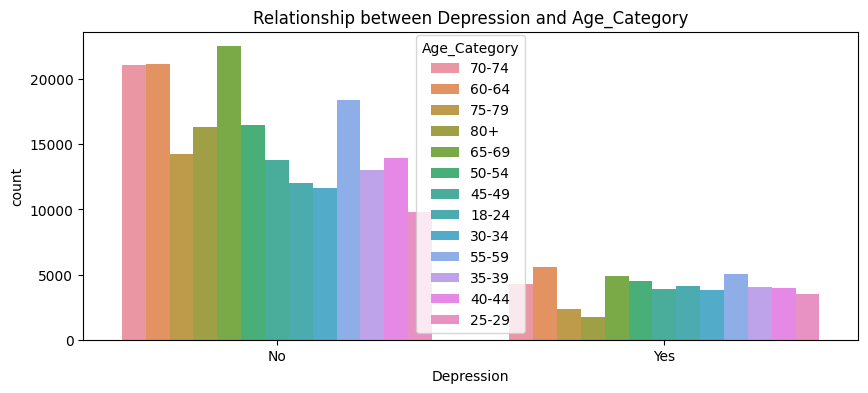

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Depression", hue="Age_Category")
plt.title("Relationship between Depression and Age_Category")
plt.show()

In [ ]:

age_catd = df.loc[df["Depression"]=="Yes"].groupby("Age_Category") ["Depression"].count().sort_values(ascending=False)
age_catd


Age_Category
60-64    5591
55-59    5024
65-69    4907
50-54    4545
70-74    4313
18-24    4139
35-39    4031
40-44    3990
45-49    3872
30-34    3825
25-29    3473
75-79    2344
80+      1716
Name: Depression, dtype: int64

In [ ]:
print("Details about reviewers with Depression based on Age_Category")
print("-"*75)
lst_A=['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49','18-24', '30-34', '55-59', '35-39', '40-44', '25-29']
for i in lst_A:
    datas_d= len(df.loc[(df["Age_Category"]==i)])
    data1s_d = len(df[(df["Depression"] == "Yes") & (df["Age_Category"] == i)])
    percentageoc = (data1s_d * 100) // datas_d
    print(percentageoc, "%  Age_Category ",i,)

Details about reviewers with Depression based on Age_Category
---------------------------------------------------------------------------
16 %  Age_Category  70-74
20 %  Age_Category  60-64
14 %  Age_Category  75-79
9 %  Age_Category  80+
17 %  Age_Category  65-69
21 %  Age_Category  50-54
21 %  Age_Category  45-49
25 %  Age_Category  18-24
24 %  Age_Category  30-34
21 %  Age_Category  55-59
23 %  Age_Category  35-39
22 %  Age_Category  40-44
26 %  Age_Category  25-29


**Observations:**

* Depression is higher in lower age groups!!
* Highest percentage of depression is found in 18-24 age group!!


Relationship between Depression and Smoking History

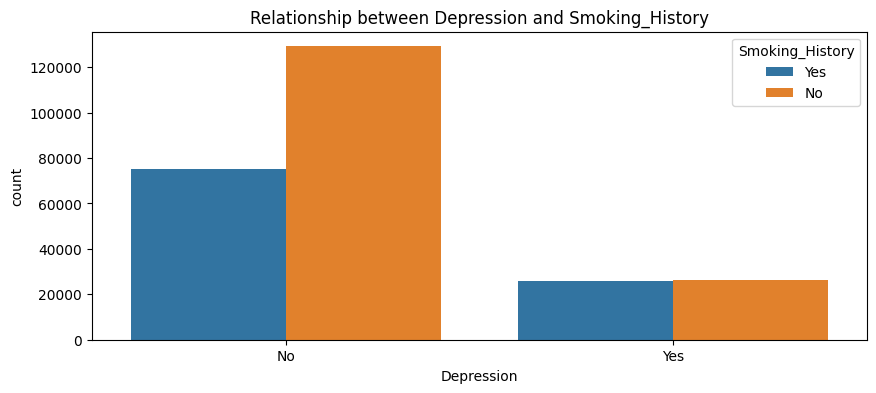

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Depression", hue="Smoking_History")
plt.title("Relationship between Depression and Smoking_History")
plt.show()

In [ ]:
print("Details about reviewers with Depression based on Smoking_History")
print("-"*75)
lst_SH=["Yes","No"]
for i in lst_SH:
    datash = len(df.loc[(df["Smoking_History"]==i)])
    data1sh = len(df.loc[(df["Depression"] == "Yes") & (df["Exercise"] == i)])
    percentage = (data1sh * 100) // datash
    print(percentage, "% of reviewers with Depression and Smoking_History ",i)

Details about reviewers with Depression based on Smoking_History
---------------------------------------------------------------------------
35 % of reviewers with Depression and Smoking_History  Yes
9 % of reviewers with Depression and Smoking_History  No


**Observations:**

 * Smoking habits increase the chances of depression almost four times more than those who do not smoke.

**Extracting details about patients having any one of the disorder**

In [ ]:
any_1 = df.loc[(df["Heart_Disease"]=="Yes")|(df["Skin_Cancer"]=="Yes")|(df["Other_Cancer"]=="Yes")|(df["Depression"]=="Yes")|(df["Diabetes"]=="Yes")|(df["Arthritis"]=="Yes")]


In [ ]:
any_1.duplicated().sum()

0

In [ ]:
len(any_1)

146133

In [ ]:
percentage_a =len(any_1)*100//len(df)
print(percentage_a)

57


Result:Total 57 percentage of reviewers have atleast 1 kind of disorder

**Extracting details about patients who have both depression and heart disorders.**

<Axes: xlabel='Heart_Disease', ylabel='count'>

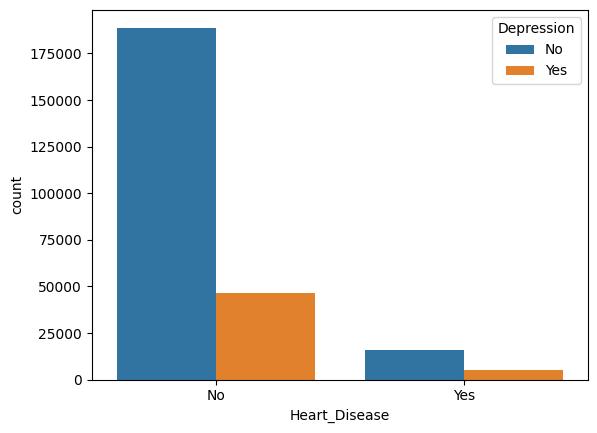

In [ ]:
sns.countplot(x='Heart_Disease', hue='Depression', data=df)

In [ ]:
h_d = df.loc[(df["Heart_Disease"]=="Yes")&(df["Depression"]=="Yes")]
len(h_d)

5073

In [ ]:
h = df.loc[df["Heart_Disease"]=="Yes"]
print(len(h))

20701


In [ ]:

pe =print("percentge of heart_disorder due to depression",len(h_d)*100//len(h))

percentge of heart_disorder due to depression 24


Observations:
* 24 percentge of heart_disorder is due to depression
* 6101 people have both heart disorder and depression

**Extracting details about patients who have both arthritis and heart disorders.**

<Axes: xlabel='Arthritis', ylabel='count'>

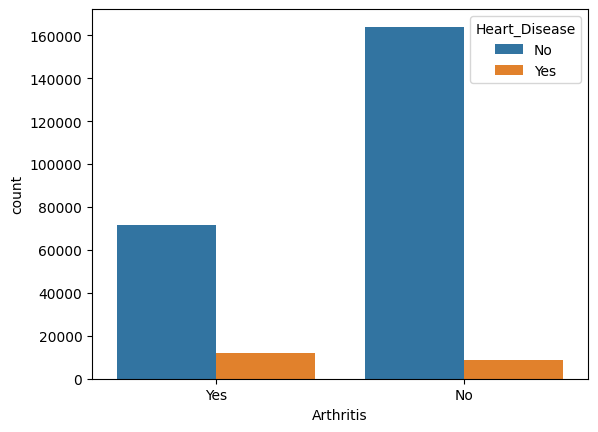

In [ ]:
sns.countplot(x='Arthritis', hue='Heart_Disease', data=df)

In [ ]:
c_a = df.loc[(df["Heart_Disease"]=="Yes")&(df["Arthritis"])]
len(c_a)


20701

In [ ]:
pec =print("percentge of heart_disorder due to arthritis",len(c_a)*100//len(h))

percentge of heart_disorder due to arthritis 100


**Extracting details about patients who have both skin_cancer and heart disorders**

<Axes: xlabel='Skin_Cancer', ylabel='count'>

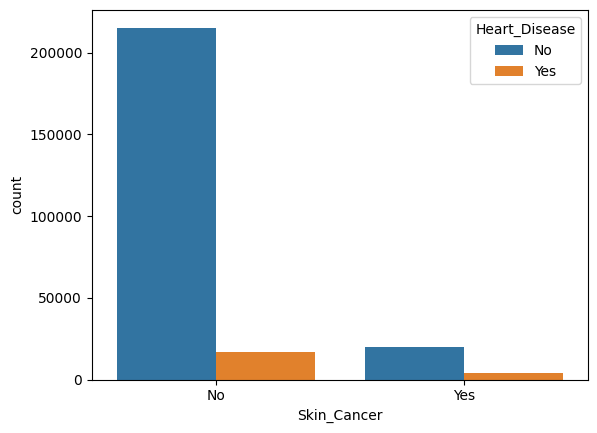

In [ ]:
sns.countplot(x='Skin_Cancer', hue='Heart_Disease', data=df)

**Extracting details about patients who have both other cancer and heart disorders**

<Axes: xlabel='Other_Cancer', ylabel='count'>

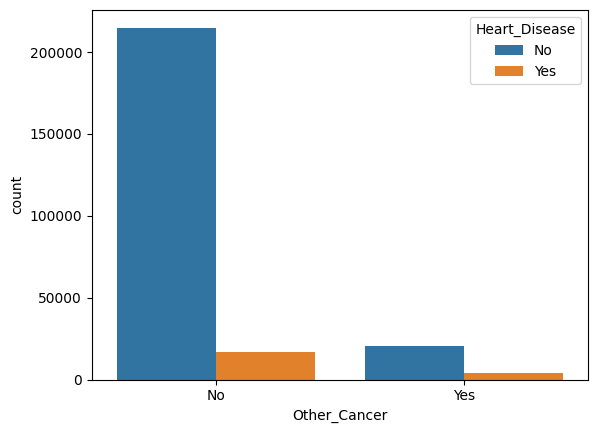

In [ ]:
sns.countplot(x='Other_Cancer', hue='Heart_Disease', data=df)

**Extracting details about patients who have both diabetes and heart disorders**

<Axes: xlabel='Diabetes', ylabel='count'>

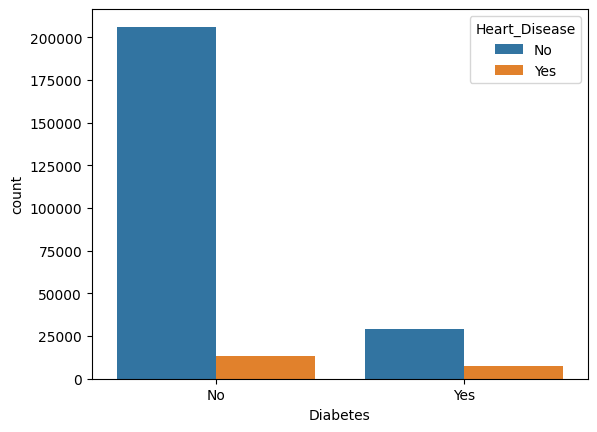

In [ ]:
sns.countplot(x='Diabetes', hue='Heart_Disease', data=df)

In [ ]:
D_H = df.loc[(df["Heart_Disease"]=="Yes")&(df["Diabetes"])]
len(D_H)

20701

In [ ]:
df["Age_Category"].unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [ ]:
df["Age_Category"].replace(['80+','75-79','70-74','65-69','60-64','55-59', '50-54', '45-49','40-44','35-39','30-34', '25-29','18-24'], [12,11,10,9,8,7,6,5,4,3,2,1,0],inplace=True)

In [ ]:
df.columns.unique()

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

# **ENCODING**

In [ ]:
df1=pd.get_dummies(df[['General_Health', 'Checkup','Exercise', 'Heart_Disease', 'Skin_Cancer','Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex','Smoking_History']],drop_first=True)
df1

General_Health_Fair  General_Health_Good  General_Health_Poor  \
0                         0                    0                    1   
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    1   
4                         0                    1                    0   
...                     ...                  ...                  ...   
256257                    0                    0                    0   
256258                    1                    0                    0   
256259                    0                    0                    0   
256260                    0                    0                    0   
256261                    0                    0                    0   

        General_Health_Very Good  Checkup_Never  \
0                              0              0   
1                              1              0   
2                              1              0   
3                              0              0   
4                              0              0   
...                          ...            ...   
256257                         1              0   
256258                         0              0   
256259                         1              0   
256260                         1              0   
256261                         0              0   

        Checkup_Within the past 2 years  Checkup_Within the past 5 years  \
0                                     1                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   
...                                 ...                              ...   
256257                                0                                0   
256258                                0                                1   
256259                                0                                0   
256260                                0                                0   
256261                                0                                0   

        Checkup_Within the past year  Exercise_Yes  Heart_Disease_Yes  \
0                                  0             0                  0   
1                                  1             0                  1   
2                                  1             1                  0   
3                                  1             1                  1   
4                                  1             0                  0   
...                              ...           ...                ...   
256257                             1             1                  0   
256258                             0             1                  0   
256259                             0             1                  0   
256260                             1             1                  0   
256261                             1             1                  0   

        Skin_Cancer_Yes  Other_Cancer_Yes  Depression_Yes  Diabetes_Yes  \
0                     0                 0               0             0   
1                     0                 0               0             1   
2                     0                 0               0             1   
3                     0                 0               0             1   
4                     0                 0               0             0   
...                 ...               ...             ...           ...   
256257                0                 0               0             0   
256258                0                 0               0             1   
256259                0                 0            

In [ ]:
dfe=pd.concat([df,df1],axis=1)
dfe

General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
256257      Very Good     Within the past year      Yes            No   
256258           Fair  Within the past 5 years      Yes            No   
256259      Very Good      5 or more years ago      Yes            No   
256260      Very Good     Within the past year      Yes            No   
256261      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression Diabetes Arthritis     Sex  ...  \
0               No           No         No       No       Yes  Female  ...   
1               No           No         No      Yes        No  Female  ...   
2               No           No         No      Yes        No  Female  ...   
3               No           No         No      Yes        No    Male  ...   
4               No           No         No       No        No    Male  ...   
...            ...          ...        ...      ...       ...     ...  ...   
256257          No           No         No       No        No    Male  ...   
256258          No           No         No      Yes        No    Male  ...   
256259          No           No        Yes      Yes        No  Female  ...   
256260          No           No         No       No        No    Male  ...   
256261          No           No         No       No        No  Female  ...   

        Checkup_Within the past year  Exercise_Yes  Heart_Disease_Yes  \
0                                  0             0                  0   
1                                  1             0                  1   
2                                  1             1                  0   
3                                  1             1                  1   
4                                  1             0                  0   
...                              ...           ...                ...   
256257                             1             1                  0   
256258                             0             1                  0   
256259                             0             1                  0   
256260                             1             1                  0   
256261                             1             1                  0   

        Skin_Cancer_Yes Other_Cancer_Yes  Depression_Yes  Diabetes_Yes  \
0                     0                0               0             0   
1                     0                0               0             1   
2                     0                0               0             1   
3                     0                0               0             1   
4                     0                0               0             0   
...                 ...              ...             ...           ...   
256257                0                0               0             0   
256258                0                0               0             1   
256259                0                0               1             1   
256260                0                0               0             0   
256261                0                0               0             0   

        Arthritis_Yes  Sex_Male  Smoking_History_Yes  
0                   1         0                    1  
1                   0         0                    0  
2                   0         0                    0  
3                   0         1                    0  
4                   0         1                    1  
...               ...       ...                  ...  
256257              0         1           

In [ ]:
dfe.Diabetes.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
dfe=dfe.drop(['General_Health', 'Checkup','Exercise', 'Heart_Disease', 'Skin_Cancer','Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex','Smoking_History'],axis=1)# 'Exercise', 'Heart_Disease', 'Skin_Cancer','Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex','Smoking_History'
dfe

Age_Category  Height_(cm)  Weight_(kg)    BMI  Alcohol_Consumption  \
0                 10        150.0        32.66  14.54                  0.0   
1                 10        165.0        77.11  28.29                  0.0   
2                  8        163.0        88.45  33.47                  4.0   
3                 11        180.0        93.44  28.73                  0.0   
4                 12        191.0        88.45  24.37                  0.0   
...              ...          ...          ...    ...                  ...   
256257             1        168.0        81.65  29.05                  4.0   
256258             9        180.0        69.85  21.48                  8.0   
256259             2        157.0        61.23  24.69                  4.0   
256260             9        183.0        79.38  23.73                  3.0   
256261             5        160.0        81.19  31.71                  1.0   

        Fruit_Consumption  Green_Vegetables_Consumption  \
0                    30.0                          16.0   
1                    30.0                           0.0   
2                    12.0                           3.0   
3                    30.0                          30.0   
4                     8.0                           4.0   
...                   ...                           ...   
256257               30.0                           8.0   
256258               15.0                          60.0   
256259               40.0                           8.0   
256260               30.0                          12.0   
256261                5.0                          12.0   

        FriedPotato_Consumption  General_Health_Fair  General_Health_Good  \
0                          12.0                    0                    0   
1                           4.0                    0                    0   
2                          16.0                    0                    0   
3                           8.0                    0                    0   
4                           0.0                    0                    1   
...                         ...                  ...                  ...   
256257                      0.0                    0                    0   
256258                      4.0                    1                    0   
256259                      4.0                    0                    0   
256260                      0.0                    0                    0   
256261                      1.0                    0                    0   

        ...  Checkup_Within the past year  Exercise_Yes  Heart_Disease_Yes  \
0       ...                             0             0                  0   
1       ...                             1             0                  1   
2       ...                             1             1                  0   
3       ...                             1             1                  1   
4       ...                             1             0                  0   
...     ...                           ...           ...                ...   
256257  ...                             1             1                  0   
256258  ...                             0             1                  0   
256259  ...                             0             1                  0   
256260  ...                             1             1                  0   
256261  ...                             1             1                  0   

        Skin_Cancer_Yes  Other_Cancer_Yes  Depression_Yes  Diabetes_Yes  \
0                     0                 0               0             0   
1                     0                 0               0             1   
2                     0                 0               0             1   
3                     0                 0               0             1   
4                     0                 0               0             0   
...                 ...               ...         

**Once again checking the encoded dataset**



In [ ]:
dfe.shape

(256262, 25)

In [ ]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256262 entries, 0 to 256261
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Age_Category                     256262 non-null  int64  
 1   Height_(cm)                      256262 non-null  float64
 2   Weight_(kg)                      256262 non-null  float64
 3   BMI                              256262 non-null  float64
 4   Alcohol_Consumption              256262 non-null  float64
 5   Fruit_Consumption                256262 non-null  float64
 6   Green_Vegetables_Consumption     256262 non-null  float64
 7   FriedPotato_Consumption          256262 non-null  float64
 8   General_Health_Fair              256262 non-null  uint8  
 9   General_Health_Good              256262 non-null  uint8  
 10  General_Health_Poor              256262 non-null  uint8  
 11  General_Health_Very Good         256262 non-null  uint8  
 12  Ch

In [ ]:
dfe.columns

Index(['Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'General_Health_Fair', 'General_Health_Good', 'General_Health_Poor',
       'General_Health_Very Good', 'Checkup_Never',
       'Checkup_Within the past 2 years', 'Checkup_Within the past 5 years',
       'Checkup_Within the past year', 'Exercise_Yes', 'Heart_Disease_Yes',
       'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes', 'Diabetes_Yes',
       'Arthritis_Yes', 'Sex_Male', 'Smoking_History_Yes'],
      dtype='object')

In [ ]:
dfe.head()

Age_Category  Height_(cm)  Weight_(kg)    BMI  Alcohol_Consumption  \
0            10        150.0        32.66  14.54                  0.0   
1            10        165.0        77.11  28.29                  0.0   
2             8        163.0        88.45  33.47                  4.0   
3            11        180.0        93.44  28.73                  0.0   
4            12        191.0        88.45  24.37                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  \
0               30.0                          16.0                     12.0   
1               30.0                           0.0                      4.0   
2               12.0                           3.0                     16.0   
3               30.0                          30.0                      8.0   
4                8.0                           4.0                      0.0   

   General_Health_Fair  General_Health_Good  ...  \
0                    0                    0  ...   
1                    0                    0  ...   
2                    0                    0  ...   
3                    0                    0  ...   
4                    0                    1  ...   

   Checkup_Within the past year  Exercise_Yes  Heart_Disease_Yes  \
0                             0             0                  0   
1                             1             0                  1   
2                             1             1                  0   
3                             1             1                  1   
4                             1             0                  0   

   Skin_Cancer_Yes  Other_Cancer_Yes  Depression_Yes  Diabetes_Yes  \
0                0                 0               0             0   
1                0                 0               0             1   
2                0                 0               0             1   
3                0                 0               0             1   
4                0                 0               0             0   

   Arthritis_Yes  Sex_Male  Smoking_History_Yes  
0              1         0                    1  
1              0         0                    0  
2              0         0                    0  
3              0         1                    0  
4              0         1                    1  

[5 rows x 25 columns]

In [ ]:
dfe.tail()

Age_Category  Height_(cm)  Weight_(kg)    BMI  Alcohol_Consumption  \
256257             1        168.0        81.65  29.05                  4.0   
256258             9        180.0        69.85  21.48                  8.0   
256259             2        157.0        61.23  24.69                  4.0   
256260             9        183.0        79.38  23.73                  3.0   
256261             5        160.0        81.19  31.71                  1.0   

        Fruit_Consumption  Green_Vegetables_Consumption  \
256257               30.0                           8.0   
256258               15.0                          60.0   
256259               40.0                           8.0   
256260               30.0                          12.0   
256261                5.0                          12.0   

        FriedPotato_Consumption  General_Health_Fair  General_Health_Good  \
256257                      0.0                    0                    0   
256258                      4.0                    1                    0   
256259                      4.0                    0                    0   
256260                      0.0                    0                    0   
256261                      1.0                    0                    0   

        ...  Checkup_Within the past year  Exercise_Yes  Heart_Disease_Yes  \
256257  ...                             1             1                  0   
256258  ...                             0             1                  0   
256259  ...                             0             1                  0   
256260  ...                             1             1                  0   
256261  ...                             1             1                  0   

        Skin_Cancer_Yes  Other_Cancer_Yes  Depression_Yes  Diabetes_Yes  \
256257                0                 0               0             0   
256258                0                 0               0             1   
256259                0                 0               1             1   
256260                0                 0               0             0   
256261                0                 0               0             0   

        Arthritis_Yes  Sex_Male  Smoking_History_Yes  
256257              0         1                    0  
256258              0         1                    0  
256259              0         0                    1  
256260              0         1                    0  
256261              0         0                    0  

[5 rows x 25 columns]

In [ ]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256262 entries, 0 to 256261
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Age_Category                     256262 non-null  int64  
 1   Height_(cm)                      256262 non-null  float64
 2   Weight_(kg)                      256262 non-null  float64
 3   BMI                              256262 non-null  float64
 4   Alcohol_Consumption              256262 non-null  float64
 5   Fruit_Consumption                256262 non-null  float64
 6   Green_Vegetables_Consumption     256262 non-null  float64
 7   FriedPotato_Consumption          256262 non-null  float64
 8   General_Health_Fair              256262 non-null  uint8  
 9   General_Health_Good              256262 non-null  uint8  
 10  General_Health_Poor              256262 non-null  uint8  
 11  General_Health_Very Good         256262 non-null  uint8  
 12  Ch

# **PRINCIPAL COMPONENT ANALYSIS**

In [ ]:
col_name = [i for i in dfe.columns ]
col_name

['Age_Category',
 'Height_(cm)',
 'Weight_(kg)',
 'BMI',
 'Alcohol_Consumption',
 'Fruit_Consumption',
 'Green_Vegetables_Consumption',
 'FriedPotato_Consumption',
 'General_Health_Fair',
 'General_Health_Good',
 'General_Health_Poor',
 'General_Health_Very Good',
 'Checkup_Never',
 'Checkup_Within the past 2 years',
 'Checkup_Within the past 5 years',
 'Checkup_Within the past year',
 'Exercise_Yes',
 'Heart_Disease_Yes',
 'Skin_Cancer_Yes',
 'Other_Cancer_Yes',
 'Depression_Yes',
 'Diabetes_Yes',
 'Arthritis_Yes',
 'Sex_Male',
 'Smoking_History_Yes']

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit_transform(dfe[col_name])
PC_components = np.arange(1, pca.shape[1] + 1)

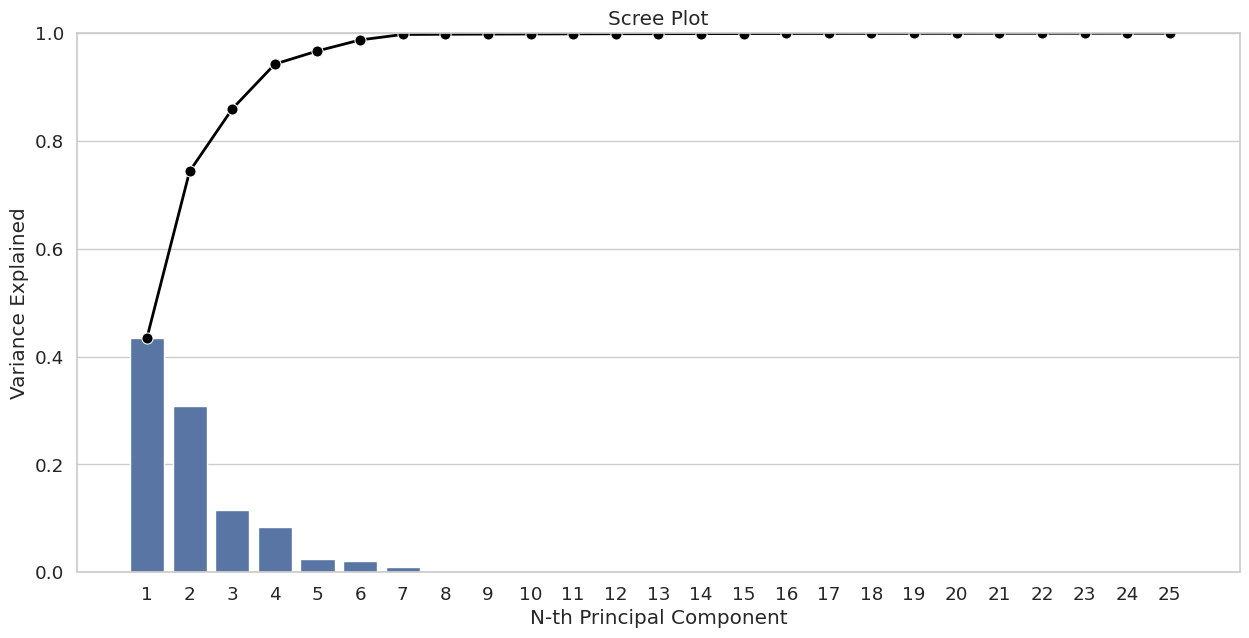

In [ ]:
sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(15, 7))

pca = PCA().fit(dfe[col_name])
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

sns.barplot(x=PC_components, y=explained_variance_ratio, color='b', ax=ax)
sns.lineplot(x=PC_components-1, y=cumulative_variance_ratio, color='black', linestyle='-', linewidth=2, marker='o', markersize=8, ax=ax)

ax.set_title('Scree Plot')
ax.set_xlabel('N-th Principal Component')
ax.set_ylabel('Variance Explained')
ax.set_ylim(0, 1)

plt.show()


In [ ]:
ds=dfe.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
ds_pca = pca.fit_transform(scaled_ds)

In [ ]:
pca.explained_variance_ratio_

array([0.11054329, 0.09826299, 0.0696978 , 0.05986325, 0.05599103,
       0.05318441, 0.04444575])

In [ ]:
ds_pca = pd.DataFrame(ds_pca, columns=["Col1",'Col2','Col3','Col4','Col5','Col6','Col7'])
ds_pca

Col1      Col2      Col3      Col4      Col5      Col6      Col7
0       0.218614 -2.773977  3.393591  3.683751 -0.242392 -0.593406 -0.757778
1       1.863574 -0.856608 -0.089292  0.556814 -1.539504 -0.129015 -1.386001
2       0.240895  0.254649 -0.215008 -1.315002 -1.708533 -0.396236 -1.325544
3       2.372327  0.997594 -1.335502  1.916291 -0.311487  0.186284  0.665931
4       0.920583  1.234676 -0.448075  0.736621  1.752694 -1.677044 -0.890089
...          ...       ...       ...       ...       ...       ...       ...
256257 -1.547459 -0.019590 -1.157408 -0.885186 -1.004302 -0.243402 -0.532497
256258 -1.286826  0.325972  0.093775  2.019788  0.150772  1.356771  4.252329
256259 -0.913383 -1.366917  1.473899 -0.048973 -1.554394  0.251883  1.000069
256260 -1.152981 -0.172666 -2.144204  0.281292 -0.431113 -0.243544 -0.621802
256261 -0.190566 -0.845609  0.396978 -1.481970 -0.352573 -0.309902 -0.626786

[256262 rows x 7 columns]

# **CLUSTERING**

In this dataset, applying clustering can assist in grouping patients with similar medical profiles/health conditions, which will help in personalized medicine.

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  data=KMeans(n_clusters=i,init="k-means++",random_state=42)
  data.fit(ds_pca)
  wcss.append(data.inertia_)

In [ ]:
print(wcss)

[3151949.0787942293, 2682432.390279815, 2305381.5763987317, 2045212.8359050169, 1882935.7229376938, 1767007.66985985, 1680949.9951696985, 1592519.654390234, 1528831.715412525, 1469320.0146880336]


In [ ]:
len(wcss)

10

Text(0, 0.5, 'Variance')

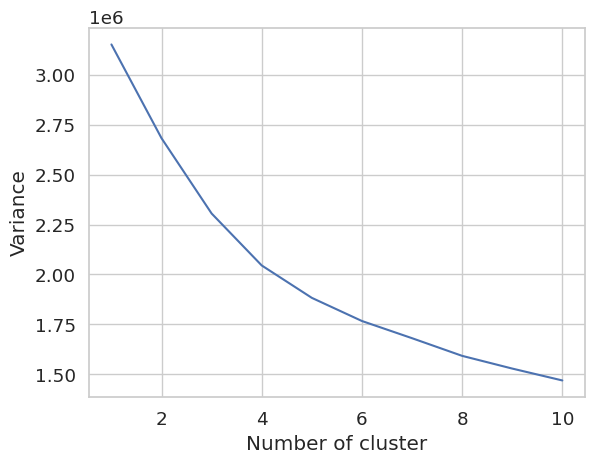

In [ ]:
lst=[i for i in range(1,11)]
plt.plot(lst,wcss)
plt.xlabel("Number of cluster")
plt.ylabel("Variance")

Visually its very difficult to choose exact elbow point so finding out the elbow point with the help of yellobricks library

Elbow Method to determine the number of clusters to be formed:


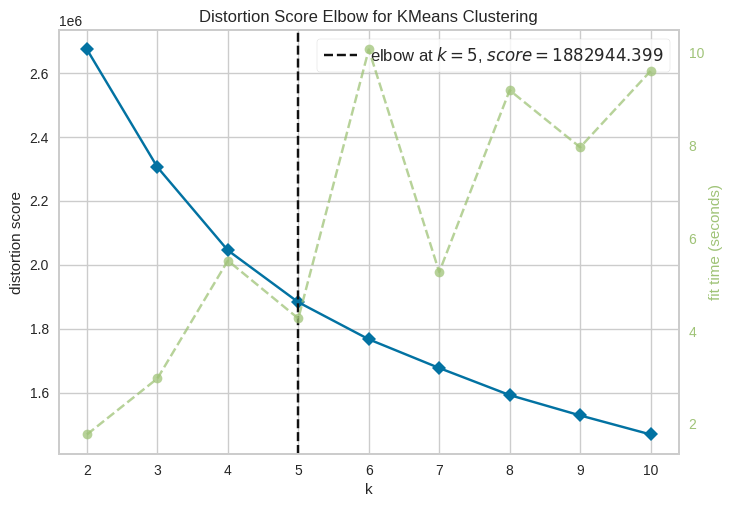

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(ds_pca)
Elbow_M.show()

In [ ]:
data1=KMeans(n_clusters=5,init="k-means++",random_state=42)
y_data=data1.fit_predict(ds_pca)
y_data

array([1, 0, 3, ..., 2, 3, 2], dtype=int32)

In [ ]:
ds_pca['cluster']=y_data
ds_pca

Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0       0.218614 -2.773977  3.393591  3.683751 -0.242392 -0.593406 -0.757778   
1       1.863574 -0.856608 -0.089292  0.556814 -1.539504 -0.129015 -1.386001   
2       0.240895  0.254649 -0.215008 -1.315002 -1.708533 -0.396236 -1.325544   
3       2.372327  0.997594 -1.335502  1.916291 -0.311487  0.186284  0.665931   
4       0.920583  1.234676 -0.448075  0.736621  1.752694 -1.677044 -0.890089   
...          ...       ...       ...       ...       ...       ...       ...   
256257 -1.547459 -0.019590 -1.157408 -0.885186 -1.004302 -0.243402 -0.532497   
256258 -1.286826  0.325972  0.093775  2.019788  0.150772  1.356771  4.252329   
256259 -0.913383 -1.366917  1.473899 -0.048973 -1.554394  0.251883  1.000069   
256260 -1.152981 -0.172666 -2.144204  0.281292 -0.431113 -0.243544 -0.621802   
256261 -0.190566 -0.845609  0.396978 -1.481970 -0.352573 -0.309902 -0.626786   

        cluster  
0             1  
1             0  
2             3  
3             0  
4             4  
...         ...  
256257        3  
256258        1  
256259        2  
256260        3  
256261        2  

[256262 rows x 8 columns]

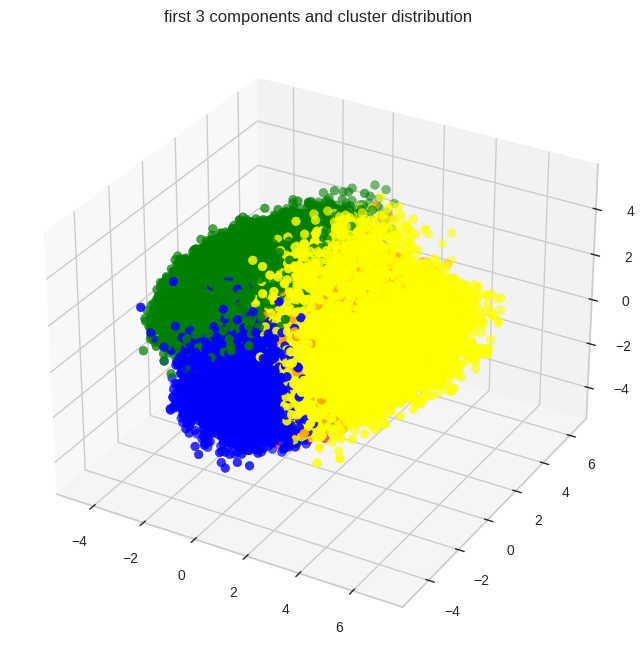

In [ ]:
from matplotlib import colors
x = ds_pca["Col1"]
y = ds_pca["Col2"]
z = ds_pca["Col3"]
cmap = colors.ListedColormap(['yellow','green','blue','red','orange'])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=ds_pca["cluster"], marker='o',cmap=cmap)
ax.set_title("first 3 components and cluster distribution")
plt.show()


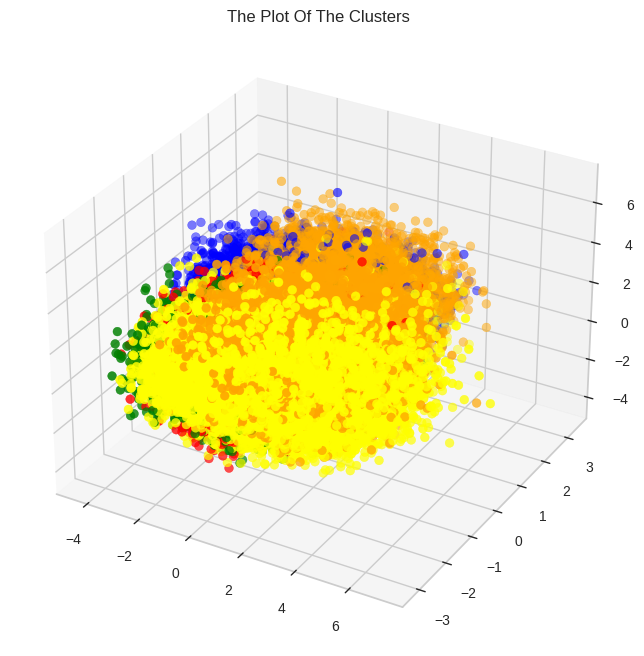

In [ ]:
x = ds_pca["Col4"]
y = ds_pca["Col5"]
z = ds_pca["Col6"]
cmap = colors.ListedColormap(['yellow','green','blue','red','orange'])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=ds_pca["cluster"], marker='o',cmap=cmap)
ax.set_title("Remaining Orthogonal components Vs Clusters")
plt.show()

In [ ]:
dfe['cluster']=y_data
dfe

Age_Category  Height_(cm)  Weight_(kg)    BMI  Alcohol_Consumption  \
0                 10        150.0        32.66  14.54                  0.0   
1                 10        165.0        77.11  28.29                  0.0   
2                  8        163.0        88.45  33.47                  4.0   
3                 11        180.0        93.44  28.73                  0.0   
4                 12        191.0        88.45  24.37                  0.0   
...              ...          ...          ...    ...                  ...   
256257             1        168.0        81.65  29.05                  4.0   
256258             9        180.0        69.85  21.48                  8.0   
256259             2        157.0        61.23  24.69                  4.0   
256260             9        183.0        79.38  23.73                  3.0   
256261             5        160.0        81.19  31.71                  1.0   

        Fruit_Consumption  Green_Vegetables_Consumption  \
0                    30.0                          16.0   
1                    30.0                           0.0   
2                    12.0                           3.0   
3                    30.0                          30.0   
4                     8.0                           4.0   
...                   ...                           ...   
256257               30.0                           8.0   
256258               15.0                          60.0   
256259               40.0                           8.0   
256260               30.0                          12.0   
256261                5.0                          12.0   

        FriedPotato_Consumption  General_Health_Fair  General_Health_Good  \
0                          12.0                    0                    0   
1                           4.0                    0                    0   
2                          16.0                    0                    0   
3                           8.0                    0                    0   
4                           0.0                    0                    1   
...                         ...                  ...                  ...   
256257                      0.0                    0                    0   
256258                      4.0                    1                    0   
256259                      4.0                    0                    0   
256260                      0.0                    0                    0   
256261                      1.0                    0                    0   

        ...  Exercise_Yes  Heart_Disease_Yes  Skin_Cancer_Yes  \
0       ...             0                  0                0   
1       ...             0                  1                0   
2       ...             1                  0                0   
3       ...             1                  1                0   
4       ...             0                  0                0   
...     ...           ...                ...              ...   
256257  ...             1                  0                0   
256258  ...             1                  0                0   
256259  ...             1                  0                0   
256260  ...             1                  0                0   
256261  ...             1                  0                0   

        Other_Cancer_Yes  Depression_Yes  Diabetes_Yes  Arthritis_Yes  \
0                      0               0             0              1   
1                      0               0             1              0   
2                      0               0             1              0   
3                      0               0             1              0   
4                      0               0             0              0   
...                  ...             ...           ...            ...   
256257                 0               0             0              0   
256258                 0               0             1              0   

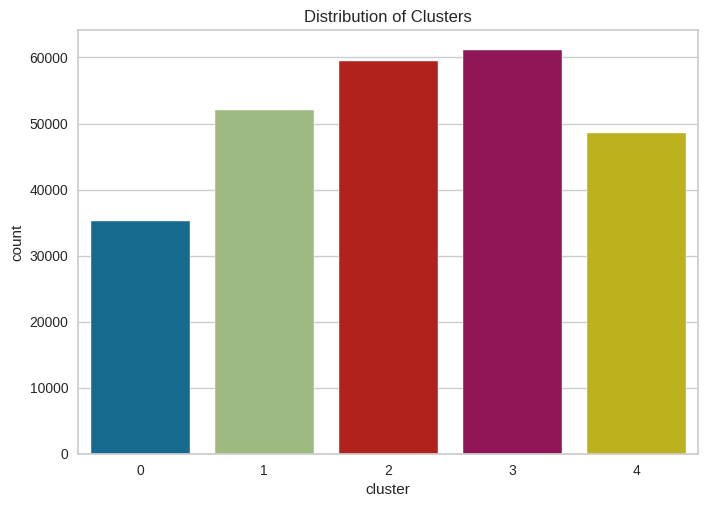

In [ ]:
sns.countplot(x=dfe["cluster"],data=dfe)
plt.title("Distribution of Clusters")
plt.show()

In [ ]:
dfe.cluster.unique()

array([4, 0, 1, 2, 3], dtype=int32)

In [ ]:
dfe.columns

Index(['Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'General_Health_Fair', 'General_Health_Good', 'General_Health_Poor',
       'General_Health_Very Good', 'Checkup_Never',
       'Checkup_Within the past 2 years', 'Checkup_Within the past 5 years',
       'Checkup_Within the past year', 'Exercise_Yes', 'Heart_Disease_Yes',
       'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes', 'Diabetes_Yes',
       'Arthritis_Yes', 'Sex_Male', 'Smoking_History_Yes', 'cluster'],
      dtype='object')

# **CLUSTER ANALYSIS**

**1.KDE plot**

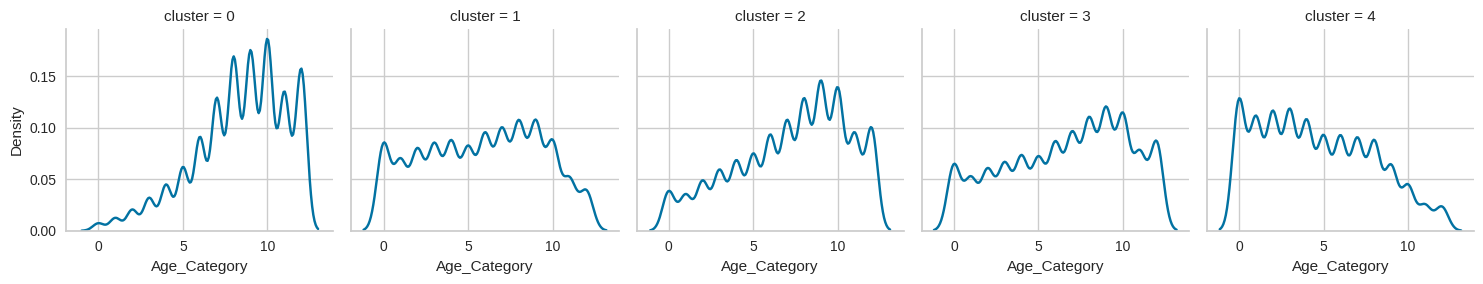

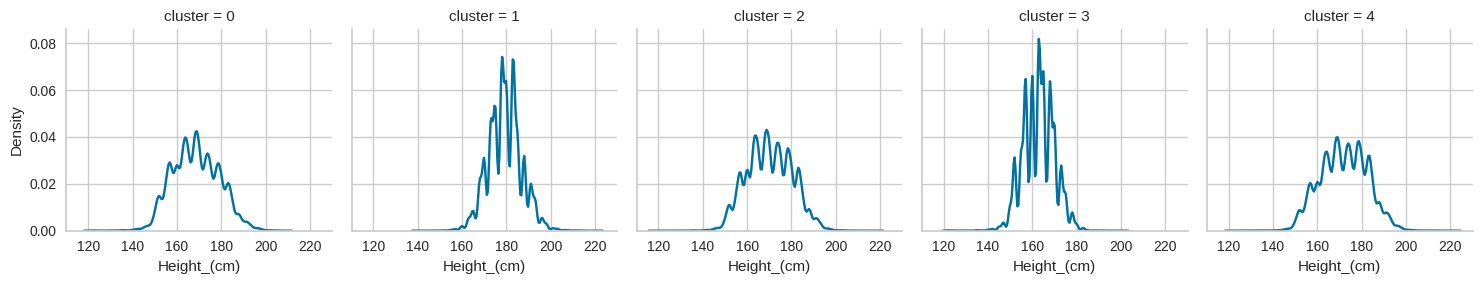

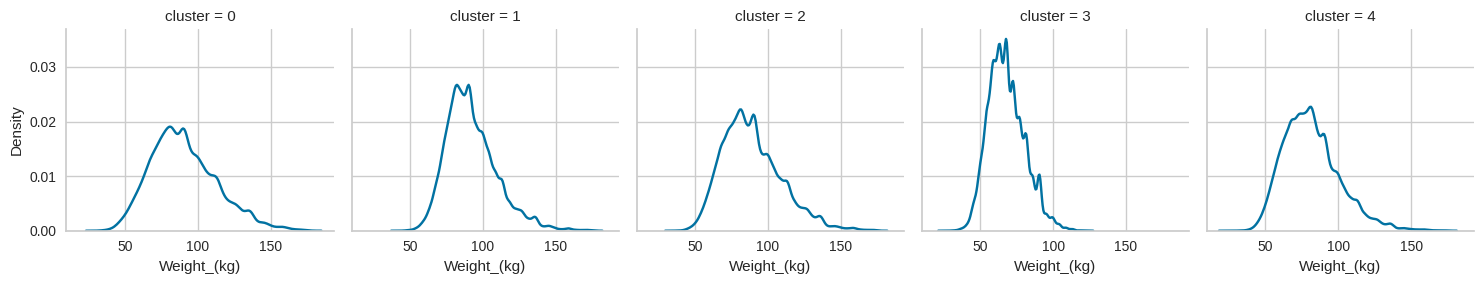

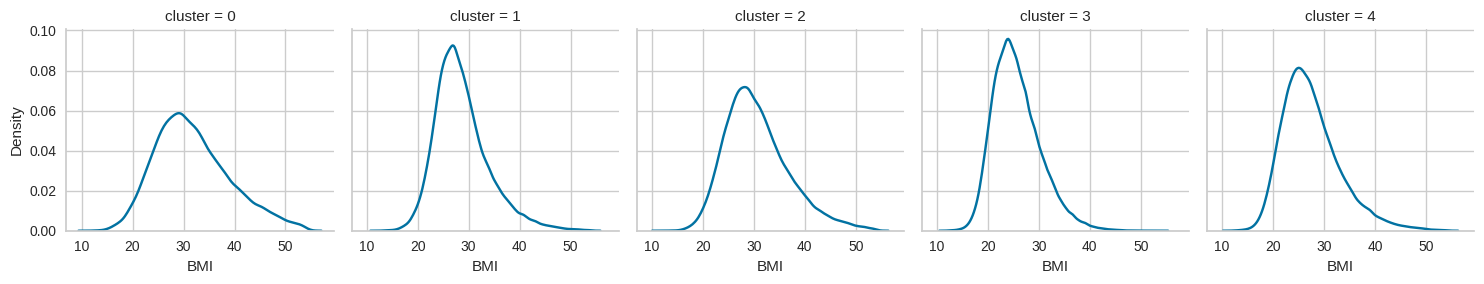

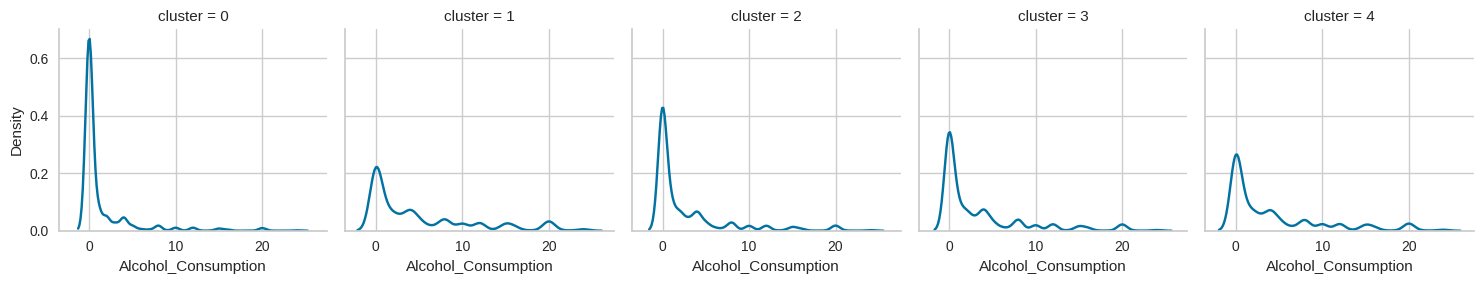

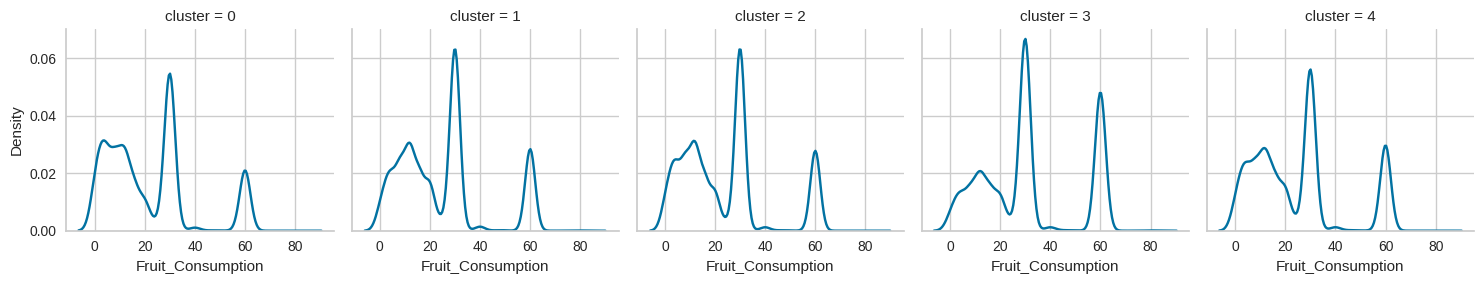

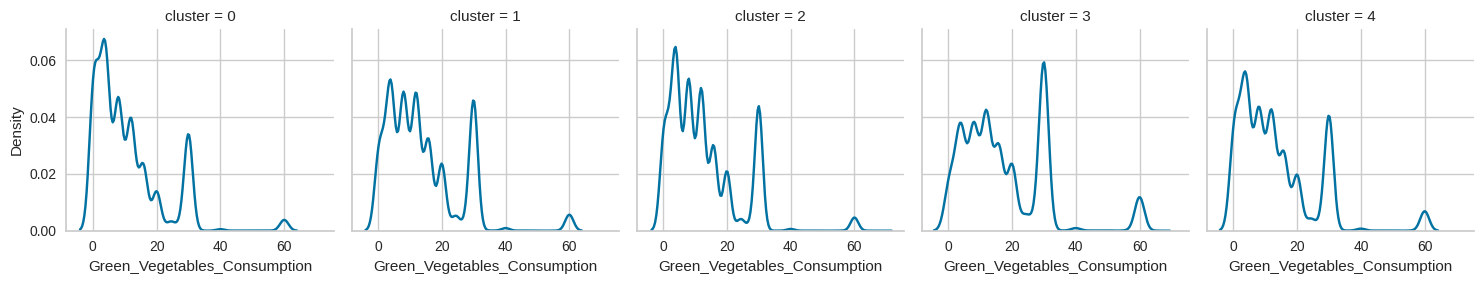

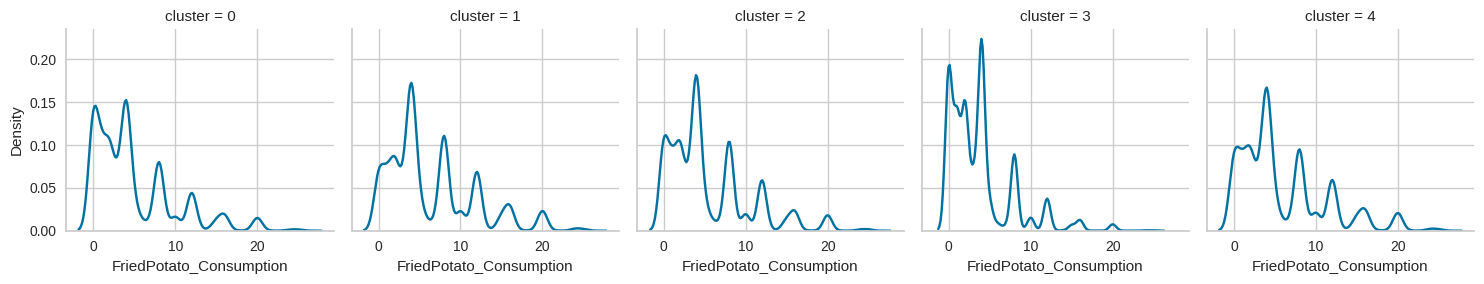

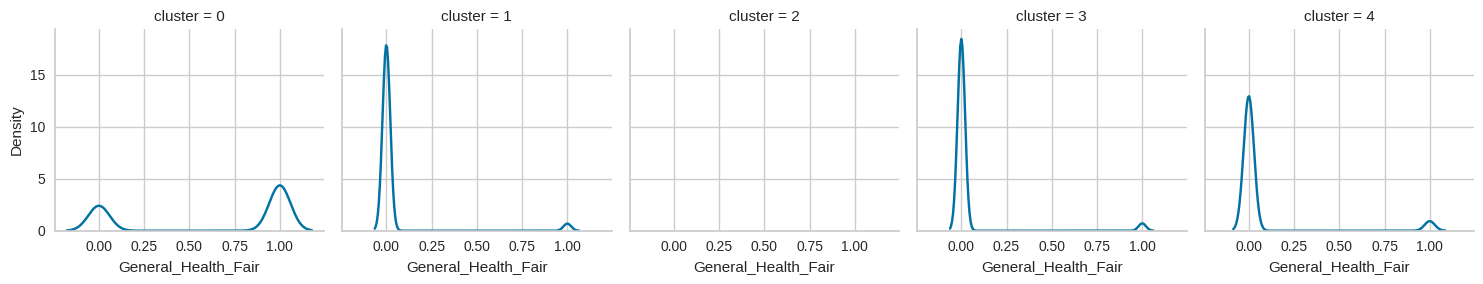

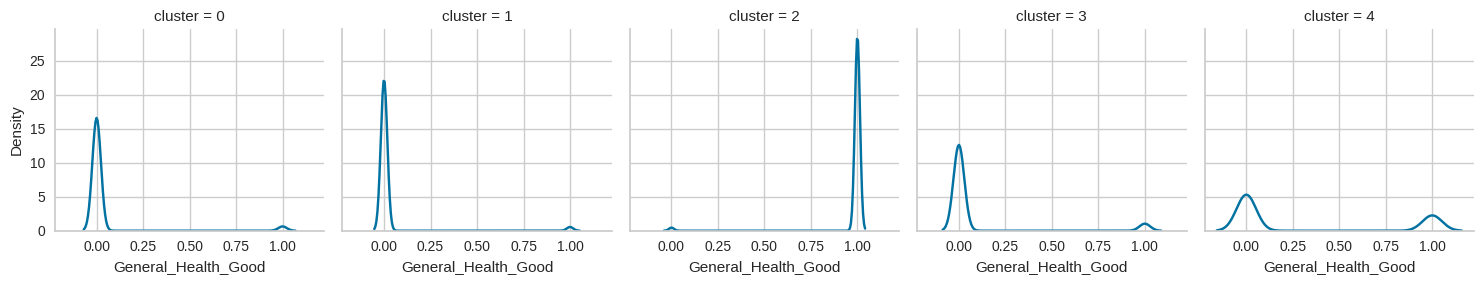

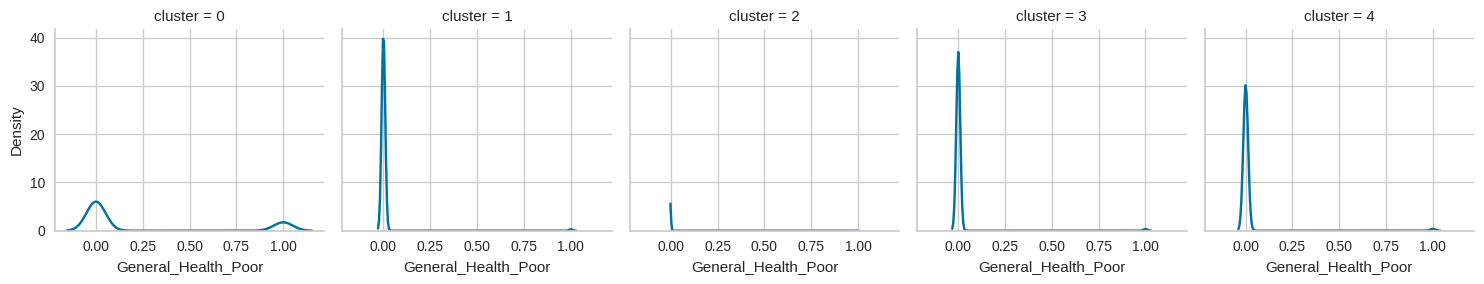

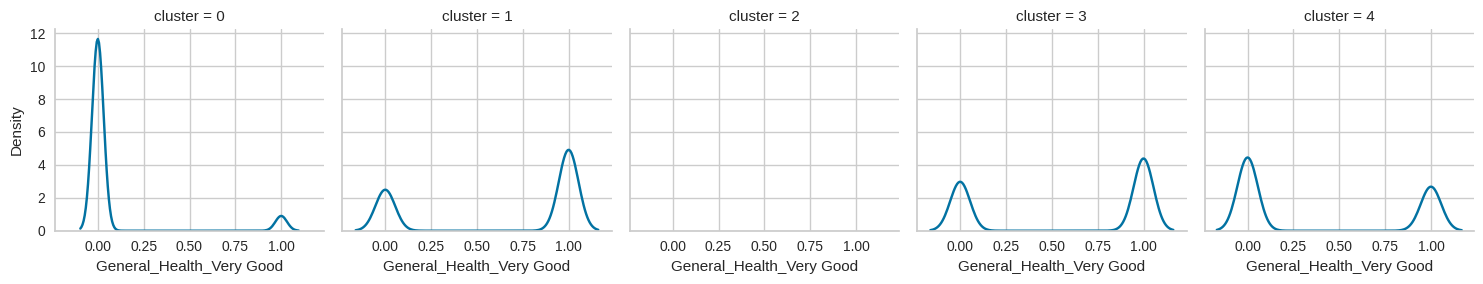

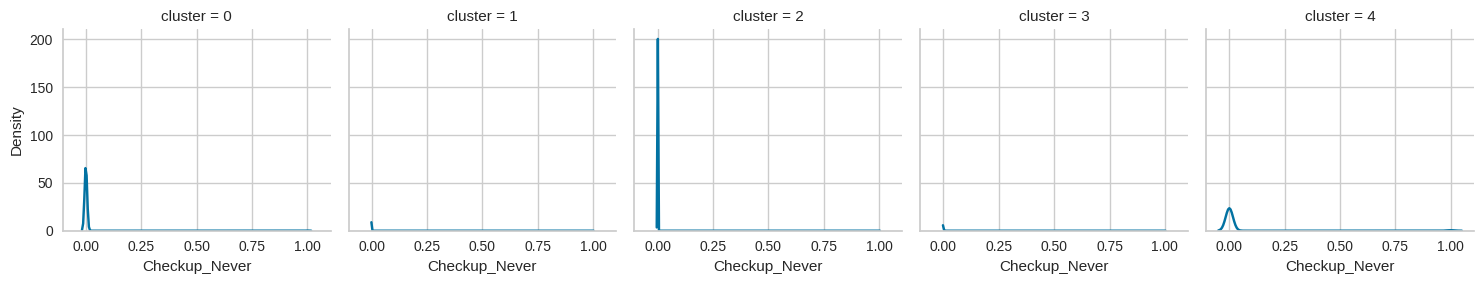

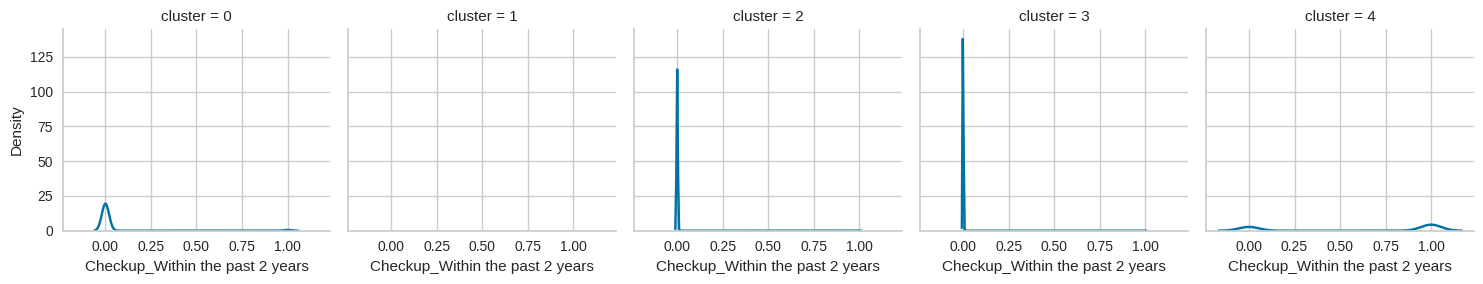

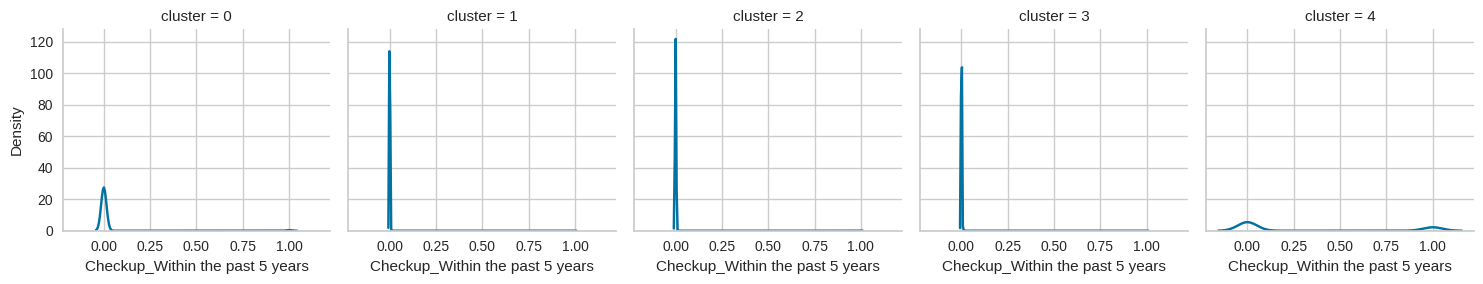

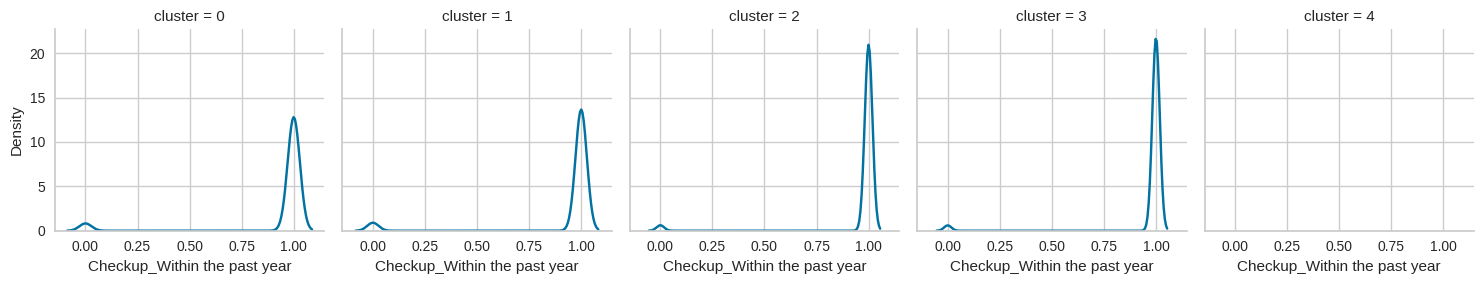

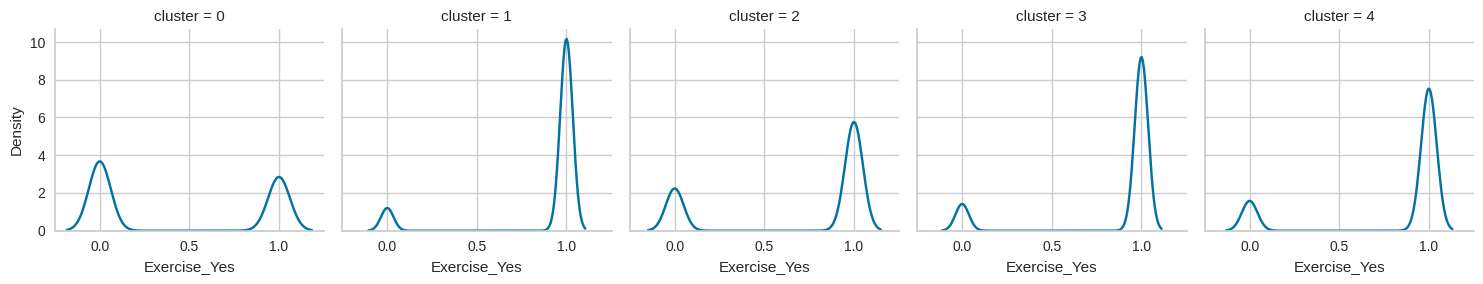

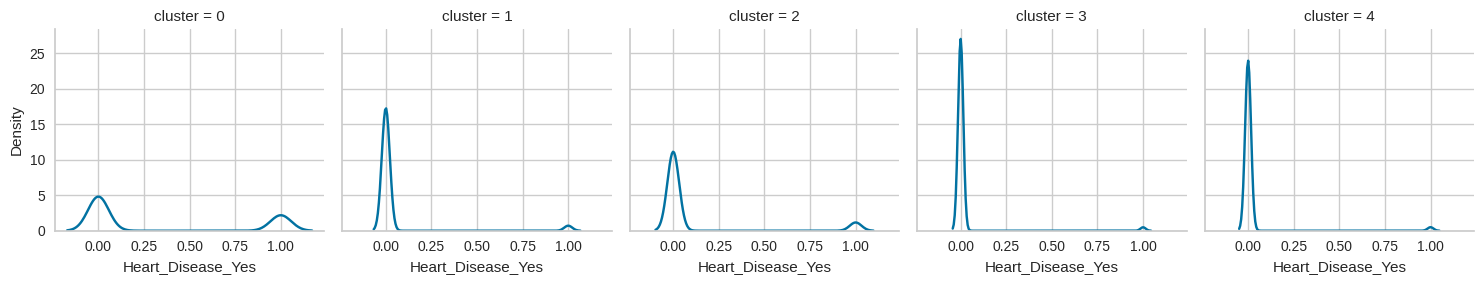

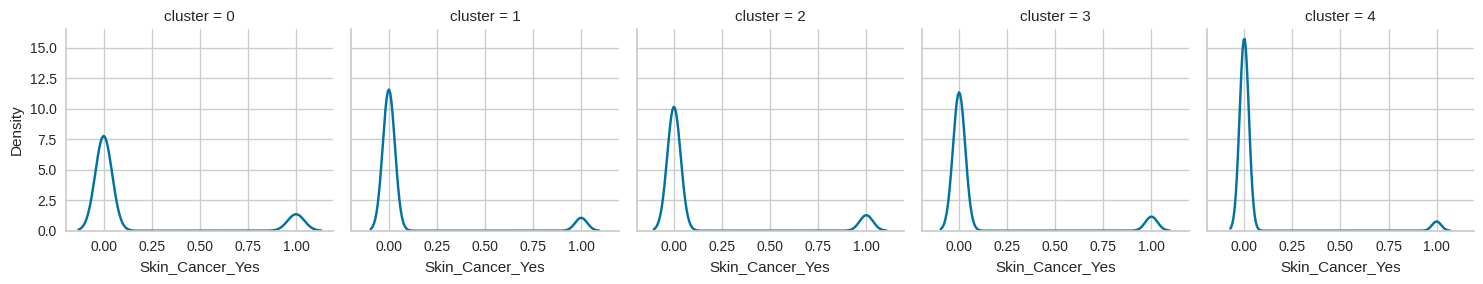

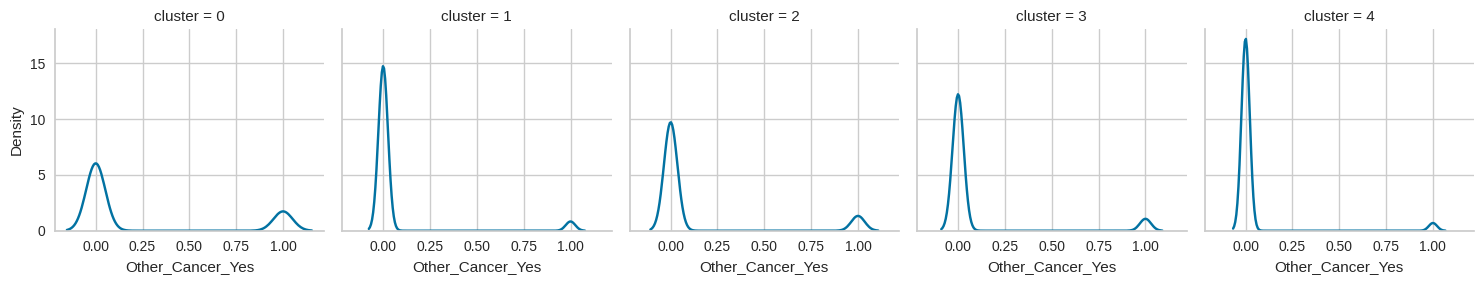

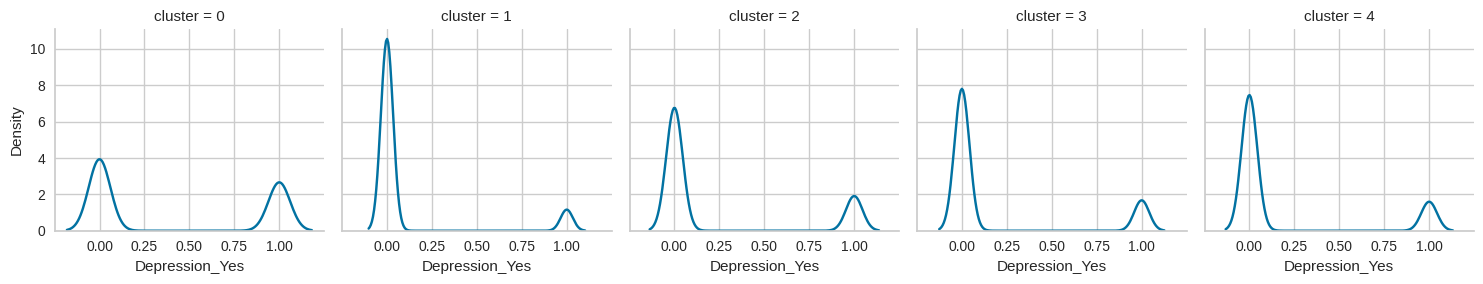

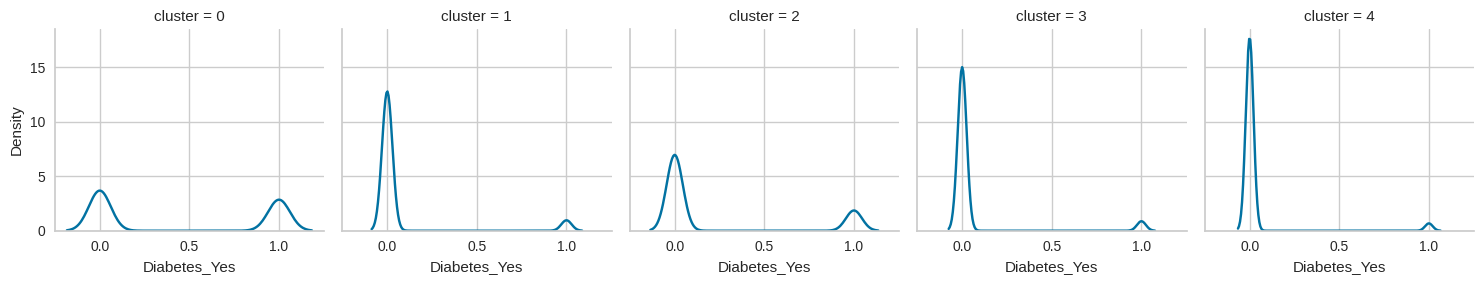

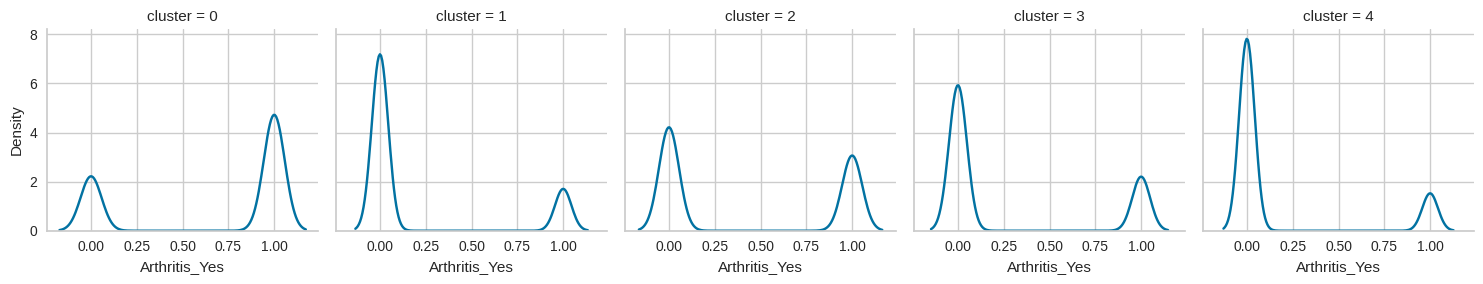

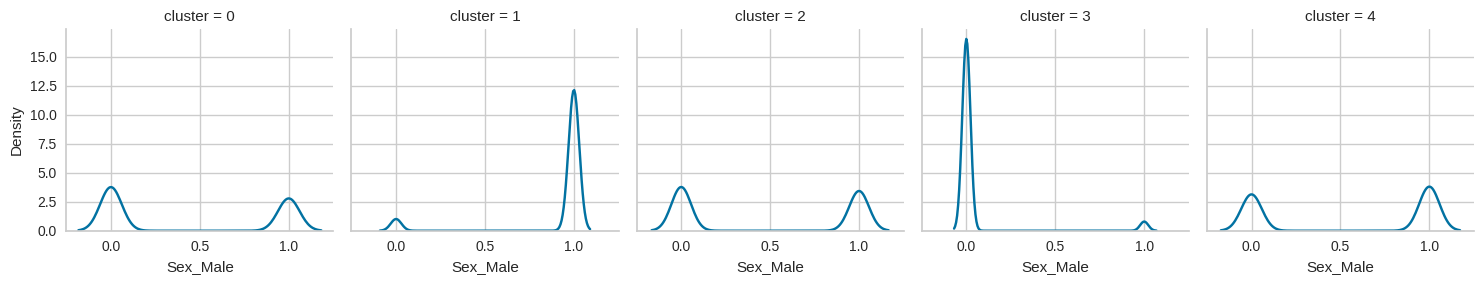

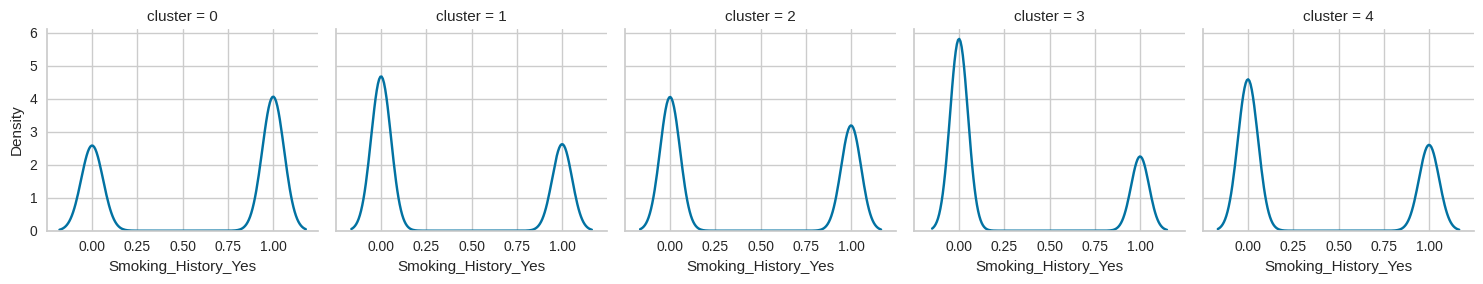

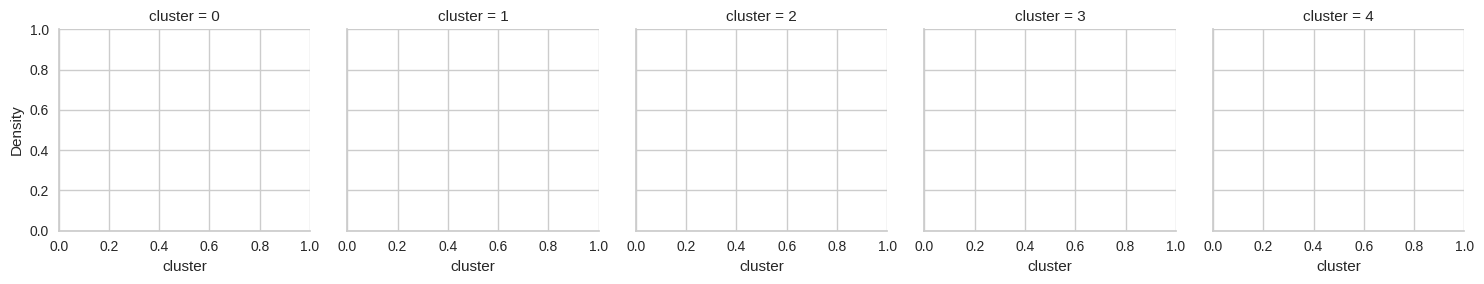

In [ ]:
for i in dfe.columns:
  g = sns.FacetGrid(dfe,col='cluster')
  g = g.map(sns.kdeplot, i)

**Observations**

* **Cluster 0:** Highest diabetes rates,Highest Arthritis rates,Highest Smoking history , maximum cases of depression and other cancers, higher instances of skin cancer, elevated heart disease rates, minimal exercise, lowest alcohol consumption, majority are in higher age groups , and highest obesity rates.

* **Cluster 1:** Minimal arthritis and diabetes cases, lowest occurrences of other cancers and skin cancer, negligible heart disease cases, no check-ups done in the past year, majority are in lower age groups, and similar smoking history rates as Cluster 4.

* **Cluster 2:** 2nd highest smoking rates,second highest arthritis, presence of heart disease, and depression,Males and Females are relatively equal in number.

* **Cluster 3:** Minimal smoking, majority are females, negligible heart disease cases, second-highest exercise levels, maximum consumption of green vegetables and fruits, and BMI within the normal range.

* **Cluster 4:** Majority are males, minimal arthritis cases, low depression rates, negligible occurrences of other cancers and heart diseases, high exercise levels, relatively higher alcohol consumption compared to other clusters, and the second-highest rate of smoking history.



**2.Heatmap**

In order to find out the correlation between each cluster, it is necessary to create different columns for each cluster. Therefore, the first step involves creating a copy of the original dataset, followed by one-hot encoding it. Finally, a correlation heatmap is plotted to determine the correlations between each cluster and disease conditions, as well as the factors influencing these diseases.

In [ ]:
dss = dfe.copy()

In [ ]:

dss["cluster"] = dss["cluster"].replace([0, 1, 2, 3, 4], ["cluster0", "cluster1", "cluster2", "cluster3","cluster4"])


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(dss[['cluster']])
feature_names = encoder.get_feature_names_out(['cluster'])
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)
print(encoded_df)


        cluster_cluster0  cluster_cluster1  cluster_cluster2  \
0                    0.0               0.0               0.0   
1                    1.0               0.0               0.0   
2                    0.0               1.0               0.0   
3                    1.0               0.0               0.0   
4                    0.0               0.0               1.0   
...                  ...               ...               ...   
256257               0.0               1.0               0.0   
256258               0.0               0.0               0.0   
256259               0.0               0.0               0.0   
256260               0.0               1.0               0.0   
256261               0.0               0.0               0.0   

        cluster_cluster3  cluster_cluster4  
0                    0.0               1.0  
1                    0.0               0.0  
2                    0.0               0.0  
3                    0.0               0.0  
4     

In [ ]:
dse = pd.concat([dss,encoded_df],axis=1)

In [ ]:
dse.drop(["cluster"],axis=1,inplace=True)


In [ ]:
dse.head()

Age_Category  Height_(cm)  Weight_(kg)    BMI  Alcohol_Consumption  \
0            10        150.0        32.66  14.54                  0.0   
1            10        165.0        77.11  28.29                  0.0   
2             8        163.0        88.45  33.47                  4.0   
3            11        180.0        93.44  28.73                  0.0   
4            12        191.0        88.45  24.37                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  \
0               30.0                          16.0                     12.0   
1               30.0                           0.0                      4.0   
2               12.0                           3.0                     16.0   
3               30.0                          30.0                      8.0   
4                8.0                           4.0                      0.0   

   General_Health_Fair  General_Health_Good  ...  Depression_Yes  \
0                    0                    0  ...               0   
1                    0                    0  ...               0   
2                    0                    0  ...               0   
3                    0                    0  ...               0   
4                    0                    1  ...               0   

   Diabetes_Yes  Arthritis_Yes  Sex_Male  Smoking_History_Yes  \
0             0              1         0                    1   
1             1              0         0                    0   
2             1              0         0                    0   
3             1              0         1                    0   
4             0              0         1                    1   

   cluster_cluster0  cluster_cluster1  cluster_cluster2  cluster_cluster3  \
0               0.0               0.0               0.0               0.0   
1               1.0               0.0               0.0               0.0   
2               0.0               1.0               0.0               0.0   
3               1.0               0.0               0.0               0.0   
4               0.0               0.0               1.0               0.0   

   cluster_cluster4  
0               1.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  

[5 rows x 30 columns]

Text(0.5, 1.0, 'Heatmap')

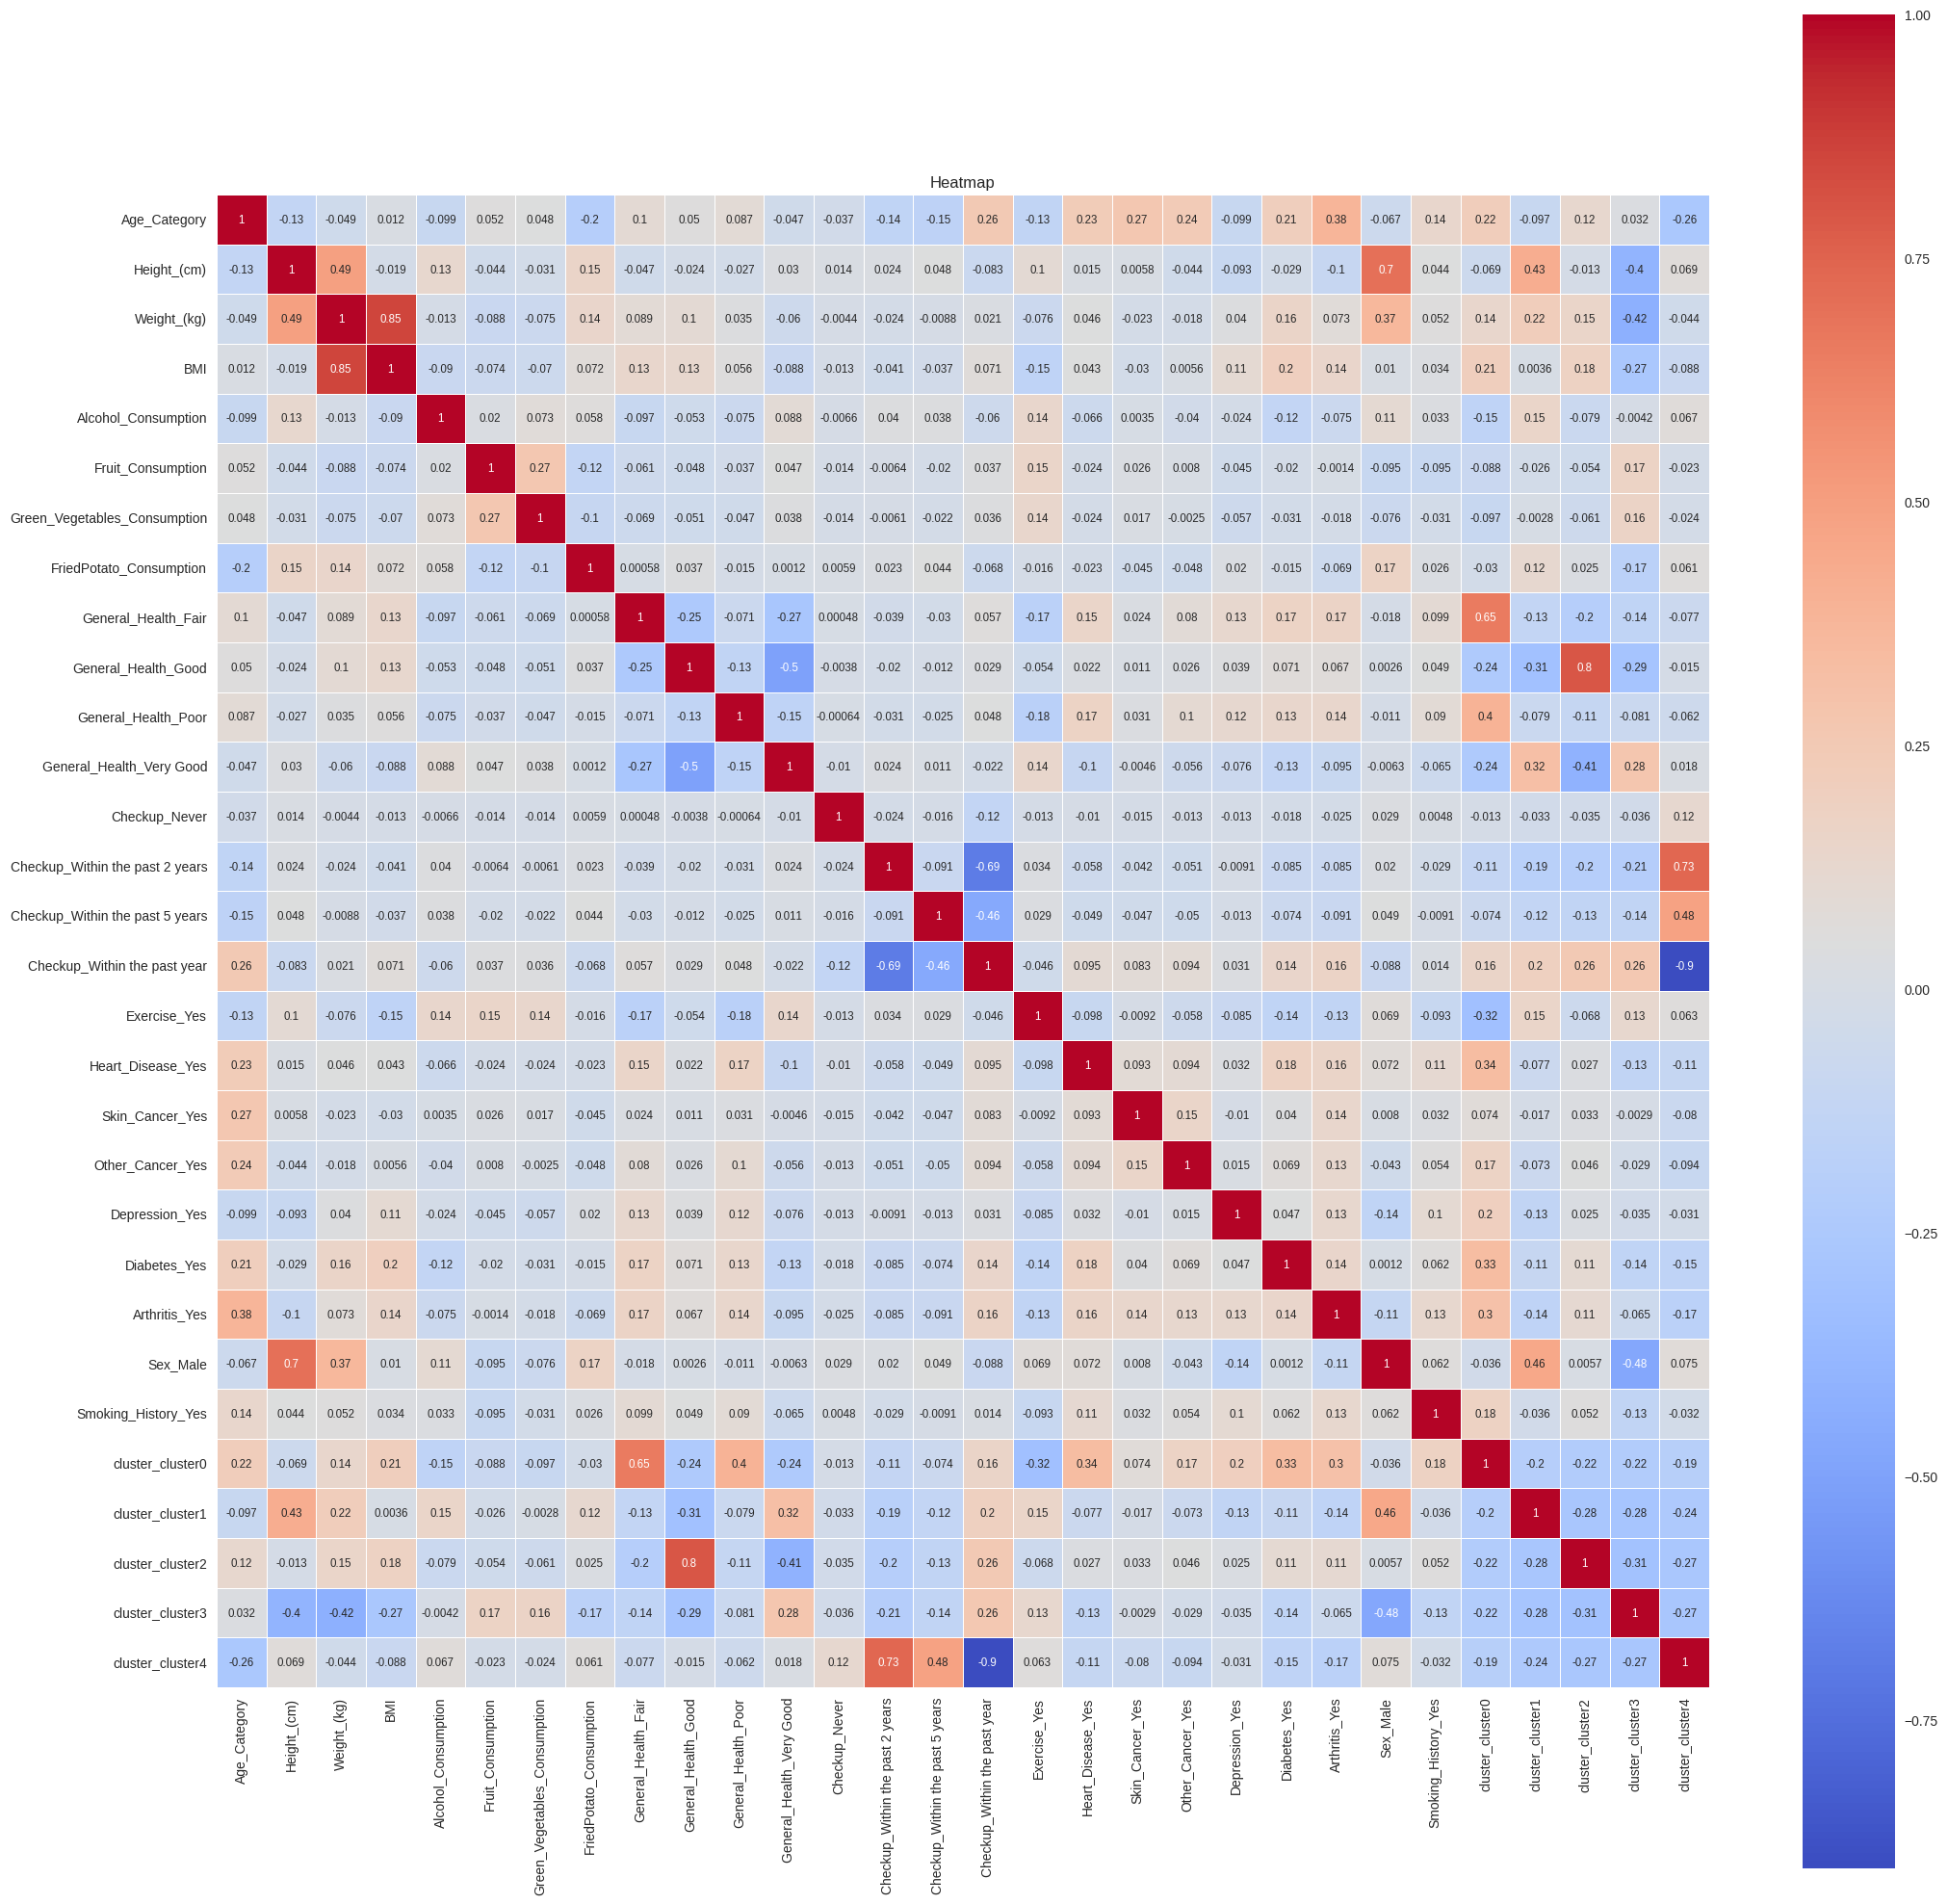

In [ ]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(dse.corr(),cmap='coolwarm',square=True,annot=True,annot_kws={'size': 'x-small', 'alpha': 1},linewidths=0.5)
plt.title('Heatmap')

**Observations:**

- **Cluster 0:** Positive correlations are observed with "general health fair," "Heart Disease yes," "skin cancer yes," "other cancers yes," "depression yes," "diabetes yes," "arthritis yes," and "smoking history yes." There are also mild positive correlations with age category, weight, and BMI, suggesting a complex health profile within this cluster.

- **Cluster 1:** This cluster shows high correlations with "sex male," "height," "general health very good," "alcohol consumption," "checkup within the past 5 years," "fried potato consumption," and "exercise yes," indicating specific health traits associated with this group.
- **Cluster 2:** This cluster exhibits a strong correlation with the "general health good" category. Additionally, it shows a positive correlation with having a checkup within the past year, and mild but positive correlations with diabetes and arthritis. There are also slight positive correlations with age category, weight, and BMI.

- **Cluster 3:** This cluster demonstrates positive correlations with "general health very good," "checkup within the past year," and "exercise yes" features. Green vegetable and fruit consumption are higher in this group. Notably, "sex male" is negatively correlated, indicating that the majority of this cluster comprises females. Similar to Cluster 4, all disorders are negatively correlated with this cluster.

- **Cluster 4:** This cluster is highly correlated with the feature "checkup within the past 2 years," followed by "checkup within the past 5 years." Interestingly, all disorders are negatively correlated with this cluster, suggesting a potential preventive health profile.






# **MEDICAL GUIDANCE/RECOMMENDATIONS**



* **Cluster 0** is at high risk because the majority of this cluster suffers from major disorders, including heart disease, cancer, diabetes, and depression. Health conditions are poor, and they also follow unhealthy lifestyles.Majority of the reviewers are belogs to higher age groups

* **Cluster 1** is the group where the majority are males. There are signs of fried potato consumption and alcohol consumption.

* **Cluster 2** is also at risk because smoking and arthritis are significantly visible in this group. This will increase the chances of heart disorders, diabetes, and cancer.Based on the uncoverd pattterns from this dataset Heart disorder rate is 3 times more in people with smoking history and Arthritis is 12 percentage higher in people with smoking history.Chances of cancer is also higher.

* **Cluster 3** contains reviewers with very good health conditions and lifestyles. The majority of them are females. The lifestyles of this cluster are also impressive compared to other clusters. Fried potato consumption is least, but fruit and vegetable consumption is the highest in this group.It indicates this cluster consumes healthy food and proper lifestyles. All disorders are negatively correlated with this cluster. However, in the future, the chances of affecting arthritis is higher because during the initial analysis, noticed a trend that arthritis and depression are 10 percentage higher in females despite age groups.

* **Cluster 4** has very good health conditions, and all disorders are negatively correlated with this cluster. There is a mild positive correlation visible towards the "sex male" feature.Majority of the reviewers are belongs to lower age groups.





# **SPLITTING INPUT FEATURES AND TARGET VARIABLE**

In [ ]:
x=dfe.iloc[:,:-1].values
x

array([[ 10.  , 150.  ,  32.66, ...,   1.  ,   0.  ,   1.  ],
       [ 10.  , 165.  ,  77.11, ...,   0.  ,   0.  ,   0.  ],
       [  8.  , 163.  ,  88.45, ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  2.  , 157.  ,  61.23, ...,   0.  ,   0.  ,   1.  ],
       [  9.  , 183.  ,  79.38, ...,   0.  ,   1.  ,   0.  ],
       [  5.  , 160.  ,  81.19, ...,   0.  ,   0.  ,   0.  ]])

In [ ]:
y=dfe.iloc[:,-1].values
y

array([4, 0, 1, ..., 3, 1, 3], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape

((179383, 25), (76879, 25))

In [ ]:
y_train.shape,y_test.shape

((179383,), (76879,))

# **CHECKING FOR OVERFITTING**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_pred)
test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_pred)

In [ ]:
print(train_accuracy)

1.0


In [ ]:
print(test_accuracy)

0.9458239571274341


**Observation**:training accuracy is significantly higher than the test accuracy, it may indicate overfitting.

# **SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# **MODEL CREATION**

Ensemble methods like Random Forest and Gradient Boosting build multiple models and combine their predictions. They tend to be more robust against overfitting compared to individual models.In addition to that using decision tree to compare the performance of each algorithms.

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.3 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import catboost
import lightgbm as lgb
from sklearn.metrics import  classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
dec = DecisionTreeClassifier(criterion="entropy",random_state=42)
rfc = RandomForestClassifier(n_estimators= 30,random_state=42)
xgb = XGBClassifier()
clf = catboost.CatBoostClassifier()
lgb_c = lgb.LGBMClassifier(force_row_wise=True)
lst_model = [dec,rfc,xgb,clf,lgb_c]

DecisionTreeClassifier(criterion='entropy', random_state=42)
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     10569
           1       0.94      0.94      0.94     15717
           2       0.97      0.97      0.97     17621
           3       0.94      0.94      0.94     18444
           4       0.98      0.98      0.98     14528

    accuracy                           0.95     76879
   macro avg       0.95      0.95      0.95     76879
weighted avg       0.95      0.95      0.95     76879

Accuracy score of DecisionTreeClassifier(criterion='entropy', random_state=42)   0.9495831111226732
RandomForestClassifier(n_estimators=30, random_state=42)
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10569
           1       0.96      0.9

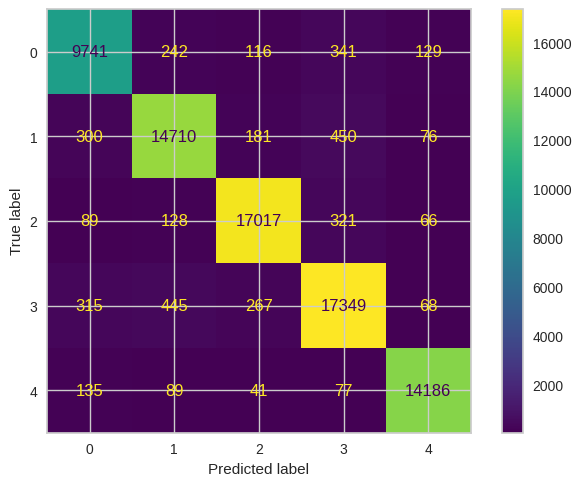

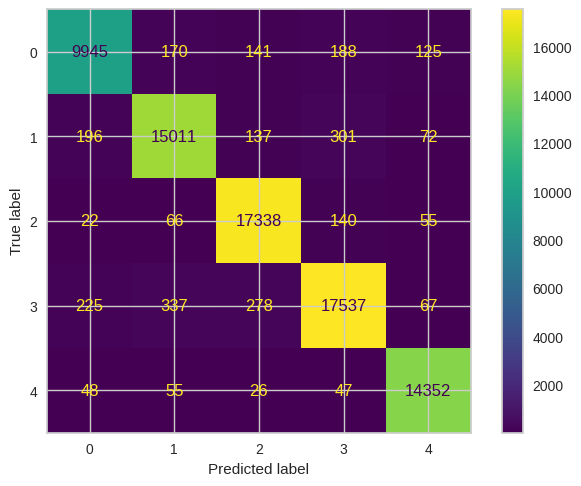

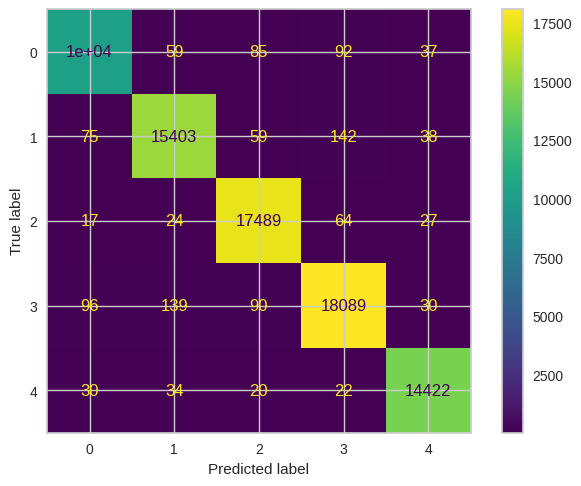

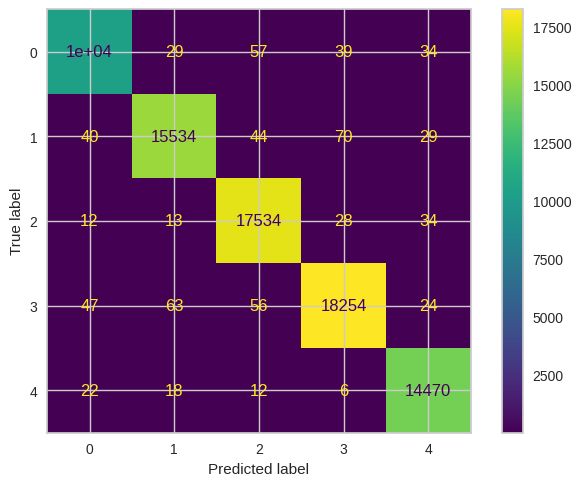

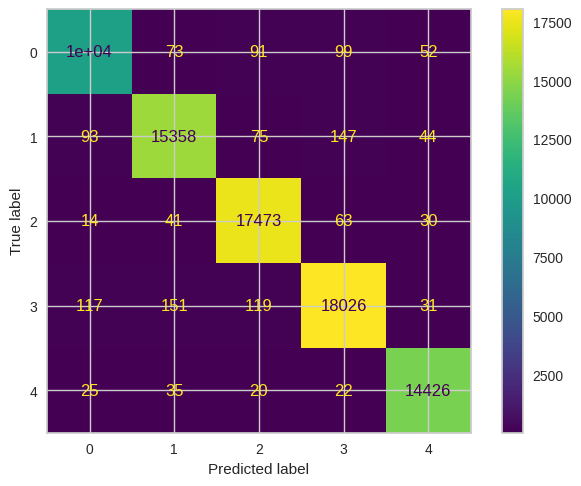

In [ ]:
for i in lst_model:
    print(i)
    print("-"*75)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(classification_report(y_test,y_pred))
    print("Accuracy score of",i," ",accuracy_score(y_test,y_pred))
    labels=[0,1,2,3,4]
    result=confusion_matrix(y_test,y_pred)
    cmd=ConfusionMatrixDisplay(result,display_labels=labels)
    cmd.plot()

In [ ]:
dic={'Model':["Decision Tree","Random Forest","XGBoost","CatBoost","LightGBM"],'Accuracy score':[0.9495,0.9649,0.9846,0.9911,0.9825]}
result=pd.DataFrame(dic)
result

Model  Accuracy score
0  Decision Tree          0.9495
1  Random Forest          0.9649
2        XGBoost          0.9846
3       CatBoost          0.9911
4       LightGBM          0.9825

<Axes: >

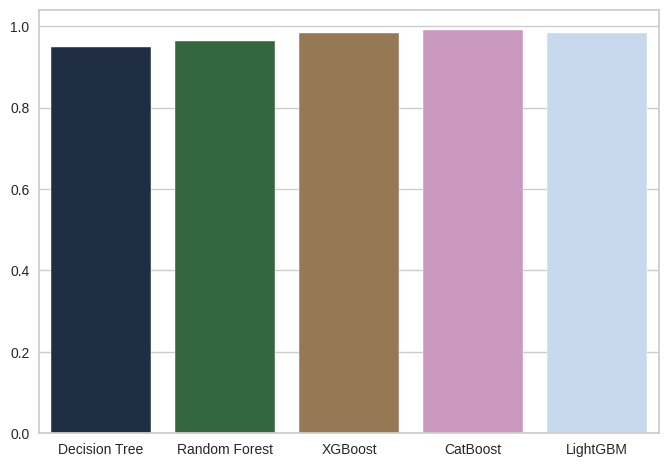

In [ ]:
sns.barplot(x='Model',y='Accuracy score',data=dic,ci=None,palette='cubehelix')

**Results:**

Cat Boost gives highest accuracy score.